<a href="https://colab.research.google.com/github/sun9huni/SARang-Lab/blob/main/0722_rdkit_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install rdkit

In [5]:
# basic molecular functionality
from rdkit import Chem

In [6]:
# Îã§ÏñëÌïú Î∞©ÏãùÏúºÎ°ú Í∞Å Î∂ÑÏûê Íµ¨ÏÑ± Í∞ÄÎä•
m = Chem.MolFromSmiles('Cc1ccccc1')
m = Chem.MolFromMolFile('data/input.mol')
stringWithMolData = open('data/input.mol','r').read()
m = Chem.MolFromMolBlock(stringWithMolData)

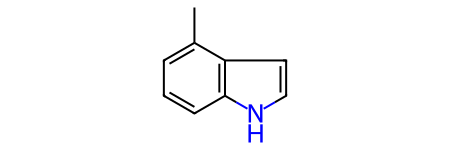

In [7]:
m

In [8]:
# Draw.MolToImage(m)
from rdkit.Chem import Draw
img = Draw.MolToImage(m)

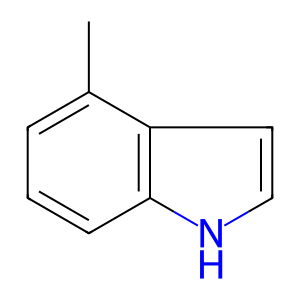

In [9]:
img

In [10]:
m1 = Chem.MolFromSmiles('CO(C)C')
# (1Î≤à ÏõêÏûê ÏÇ∞ÏÜå(O)Ïùò ÏõêÏûêÍ∞ÄÍ∞Ä ÌóàÏö©Îêú Í∞íÏùÑ Ï¥àÍ≥ºÌñàÏäµÎãàÎã§)

[10:34:04] Explicit valence for atom # 1 O, 3, is greater than permitted


In [11]:
m2 = Chem.MolFromSmiles('c1cc1')
# (Î∂ÑÏûêÎ•º ÏºÄÏø®ÌôîÌï† Ïàò ÏóÜÏäµÎãàÎã§)
# aromatic ringÏùÑ Îã®Ïùº-Ïù¥Ï§ë Í≤∞Ìï©Ïù¥ Î≤àÍ∞àÏïÑ ÎÇòÌÉÄÎÇòÎäî ÌòïÌÉúÎ°ú Î≥ÄÌôòÌï† Ïàò ÏóÜÎã§.

[10:34:04] Can't kekulize mol.  Unkekulized atoms: 0 1 2


# Reading sets of molecules
Groups of molecules are read using a Supplier (for example, an rdkit.Chem.rdmolfiles.SDMolSupplier or a rdkit.Chem.rdmolfiles.SmilesMolSupplier):
Ïó¨Îü¨ Í∞úÏùò Î∂ÑÏûê Ï†ïÎ≥¥Í∞Ä Îì§Ïñ¥ÏûàÎäî ÌååÏùºÏùÑ Ìö®Ïú®Ï†ÅÏúºÎ°ú ÏùΩÏñ¥Îì§Ïù¥Í∏∞ ÏúÑÌïú ÎèÑÍµ¨

In [12]:
# ÏõêÏûê Î≤àÌò∏ ÌôïÏù∏
suppl = Chem.SDMolSupplier('data/5ht3ligs.sdf')
for mol in suppl:
  print(mol.GetNumAtoms())

20
24
24
26


In [13]:
# Î∂ÑÏûê Ï¥ù Í∞úÏàò ÌôïÏù∏
mols = [x for x in suppl]
len(mols)

4

In [14]:
suppl[0].GetNumAtoms()

20

In [15]:
# ÏïàÏ†ÑÌïú ÌååÏùº Ï≤òÎ¶¨
with Chem.SDMolSupplier('data/5ht3ligs.sdf') as suppl:
  for mol in suppl:
    if mol is None: continue
    print(mol.GetNumAtoms())

20
24
24
26


In [16]:
# ÌååÏùº Í∞ùÏ≤¥ ÏßÅÏ†ë ÏÇ¨Ïö©
inf = open('data/5ht3ligs.sdf','rb')
with Chem.ForwardSDMolSupplier(inf) as fsuppl:
  for mol in fsuppl:
    if mol is None: continue
    print(mol.GetNumAtoms())

20
24
24
26


In [17]:
# ÏïïÏ∂ï ÌååÏùº Ï≤òÎ¶¨
import gzip
inf = gzip.open('data/actives_5ht3.sdf.gz')
with Chem.ForwardSDMolSupplier(inf) as gzsuppl:
  ms = [x for x in gzsuppl if x is not None]
len(ms)

180

In [18]:
# []Ïù∏Îç±Ïã±ÏùÑ ÏÇ¨Ïö©Ìïú ÏûÑÏùò Ï†ëÍ∑º Ïãú ÏóêÎü¨ Î∞úÏÉù
inf = open('data/5ht3ligs.sdf','rb')
with Chem.ForwardSDMolSupplier(inf) as fsuppl:
  fsuppl[0]  # <- Ïó¨Í∏∞ÏÑú TypeError Î∞úÏÉù!

TypeError: 'ForwardSDMolSupplier' object is not subscriptable

In [19]:
i = 0
with Chem.MultithreadedSDMolSupplier('data/5ht3ligs.sdf') as sdSupl:
  for mol in sdSupl:
    if mol is not None:
      i += 1

print(i)
# multithreading Ïù¥Ïö© ÌååÏùºÏóêÏÑú Î∂ÑÏûêÎ•º ÏùΩÍ∏∞ÏôÄ Ï≤òÎ¶¨ÌïòÎäî ÏûëÏóÖÏùÑ ÎèôÏãúÏóê ÏàòÌñâÌïòÏó¨ ÏÑ±Îä•ÏùÑ ÎÜíÏù∏Îã§.

4


# Writing molecules

In [20]:
# Î∂ÑÏûê ÏÉùÏÑ±
m = Chem.MolFromMolFile('data/chiral.mol')
Chem.MolToSmiles(m)

'C[C@H](O)c1ccccc1'

In [21]:
# ÏûÖÏ≤¥ÌôîÌïô(3Ï∞®Ïõê) Ï†ïÎ≥¥ Ï†úÍ±∞
Chem.MolToSmiles(m,isomericSmiles=False)

'CC(O)c1ccccc1'

In [22]:
# Canonical SMILES - ÌïòÎÇòÏùò Î∂ÑÏûê Íµ¨Ï°∞Ïóê ÎåÄÌï¥ Îã® ÌïòÎÇòÏùò Ïú†ÏùºÌïú SMILES Î¨∏ÏûêÏó¥
Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1'))
Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))
Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1'))

'c1ccncc1'

In [23]:
# kekuleSmiles
# Î∞©Ìñ•Ï°± Í≥†Î¶¨Î•º ÏÜåÎ¨∏Ïûê ÎåÄÏã† kekule Íµ¨Ï°∞Î°ú ÌëúÌòÑ
Chem.Kekulize(m)
Chem.MolToSmiles(m, kekuleSmiles = True)

'C[C@H](O)C1=CC=CC=C1'

In [24]:
# MDL Mol block
# ÏõêÏûêÏùò Ï¢åÌëú, Í≤∞Ìï© Ï†ïÎ≥¥ Îì±ÏùÑ Îã¥Í≥† ÏûàÎäî ÌëúÏ§Ä ÌÖçÏä§Ìä∏ ÌòïÏãù
m2 = Chem.MolFromSmiles('C1CCC1')
print(Chem.MolToMolBlock(m2))


     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In [25]:
# Ïù¥Î¶Ñ ÏÑ§Ï†ï
m2.SetProp("_Name", "cyclobutane")
print(Chem.MolToMolBlock(m2))


cyclobutane
     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In [26]:
from rdkit.Chem import AllChem

# Î∂ÑÏûêÏùò 2D Ï¢åÌëúÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ Ï†ÄÏû•
AllChem.Compute2DCoords(m2)

0

In [27]:
print(Chem.MolToMolBlock(m2))

cyclobutane
     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In [28]:
# 3D Íµ¨Ï°∞ ÏÉùÏÑ±ÏùÑ ÏúÑÌï¥ ÏàòÏÜå Ï∂îÍ∞Ä(Ï†ïÌôïÌïú 3D Ï¢åÌëúÎ•º ÏúÑÌï¥ ÌïÑÏàò)
m3 = Chem.AddHs(m2)
# ÎûúÎç§ ÏãúÎìú ÏÑ§Ï†ï
params = AllChem.ETKDGv3()
params.randomSeed = 0xf00d
# 3D Íµ¨Ï°∞ ÏÉùÏÑ±
AllChem.EmbedMolecule(m3, params)

0

In [29]:
print(Chem.MolToMolBlock(m3))

cyclobutane
     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    1.0257    0.2442   -0.0991 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2041    0.9236    0.4320 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0443   -0.2424   -0.0253 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2102   -0.9939   -0.3417 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4192    0.7683   -0.9787 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8181    0.1486    0.6820 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1697    1.0826    1.5236 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5360    1.8377   -0.1050 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6809   -0.0600   -0.8987 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6510   -0.6193    0.8225 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4659   -1.7768    0.3858 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.3467   -1.3126   -1.3975 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
  1  5  1  0
  1  6  1  0
  2  7

In [30]:
# Î∂ÑÏÑùÏóê ÌïÑÏöî ÏóÜÎã§Î©¥ ÏàòÏÜå Îã§Ïãú Ï†úÍ±∞
m3 = Chem.RemoveHs(m3)
print(Chem.MolToMolBlock(m3))

cyclobutane
     RDKit          3D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0257    0.2442   -0.0991 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2041    0.9236    0.4320 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0443   -0.2424   -0.0253 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2102   -0.9939   -0.3417 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



In [31]:
# ÌååÏùºÎ°ú Ï†ÄÏû•
print(Chem.MolToMolBlock(m2), file = open('data/foo.mol','w+'))

# Writing sets of molecules

In [32]:
# data/foo.sdf ÌååÏùºÏóê Î∂ÑÏûêÎ•º Ïì∞Í∏∞
with Chem.SDWriter('data/foo.sdf') as w:
  for m in mols:
    w.write(m)

In [33]:
from io import StringIO
sio = StringIO() # ÌååÏùºÏ≤òÎüº ÏûëÎèôÌïòÎäî Ïù∏Î©îÎ™®Î¶¨ ÌÖçÏä§Ìä∏ Î≤ÑÌçº ÏÉùÏÑ±
with Chem.SDWriter(sio) as w:
  for m in mols:
    w.write(m)
print(sio.getvalue())

mol-295
     RDKit          3D

 20 22  0  0  1  0  0  0  0  0999 V2000
    2.3200    0.0800   -0.1000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8400   -1.2200    0.1200 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6800    0.0800    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7400    1.2800   -0.5600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9400   -1.9200    0.6000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5400   -1.7400   -0.0800 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0200   -1.1400    0.6600 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.4600    1.2600    0.1600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5200    2.4600   -0.6600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3800   -1.0400   -0.5000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3000   -2.9200    0.1800 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.8800    2.4400   -0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6800   -1.2400   -0.7800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5800   -0.32

# Working with Molecules


In [34]:
m = Chem.MolFromSmiles('C1OC1')
# Î™®Îì† ÏõêÏûêÏùò ÏõêÏûê Î≤àÌò∏ Ï∂úÎ†•
for atom in m.GetAtoms():
  print(atom.GetAtomicNum())
# Ï≤´ Î≤àÏß∏ Í≤∞Ìï©Ïùò Ï¢ÖÎ•ò Ï∂úÎ†•
print(m.GetBonds()[0].GetBondType())

6
8
6
SINGLE


ÏßÅÏ†ë Ï†ëÍ∑ºÌïòÍ∏∞

In [35]:
# 0 Î≤à Ïù∏Îç±Ïä§ ÏõêÏûêÏùò ÏÜçÏÑ±
print(m.GetAtomWithIdx(0).GetSymbol())
print(m.GetAtomWithIdx(0).GetExplicitValence())
print(m.GetBondWithIdx(0).GetBeginAtomIdx())
print(m.GetBondWithIdx(0).GetEndAtomIdx())
print(m.GetBondBetweenAtoms(0,1).GetBondType())

C
2
0
1
SINGLE


[10:34:16] DEPRECATION WARNING: please use GetValence(which=)


In [36]:
# 0Î≤à Ïù∏Îç±Ïä§ ÏõêÏûêÏùò Ïù¥ÏõÉ ÏõêÏûêÎì§Ïùò ÏõêÏûê Î≤àÌò∏
atom = m.GetAtomWithIdx(0)
[x.GetAtomicNum() for x in atom.GetNeighbors()]

[8, 6]

In [37]:
len(atom.GetNeighbors()[-1].GetBonds())

2

Ring Information

- IsInRing(): ÏõêÏûê ÎòêÎäî Í≤∞Ìï©Ïù¥ Ïñ¥Îñ§ Í≥†Î¶¨ÏóêÎì† ÏÜçÌï¥ ÏûàÎäîÏßÄ ÌôïÏù∏

- IsInRingSize(N): ÏõêÏûê ÎòêÎäî Í≤∞Ìï©Ïù¥ NÍ∞úÏùò ÏõêÏûêÎ°ú Ïù¥Î£®Ïñ¥ÏßÑ ÌäπÏ†ï ÌÅ¨Í∏∞Ïùò Í≥†Î¶¨Ïóê ÏÜçÌï¥ ÏûàÎäîÏßÄ ÌôïÏù∏

In [38]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
m.GetAtomWithIdx(0).IsInRing()
m.GetAtomWithIdx(1).IsInRing()
m.GetAtomWithIdx(2).IsInRingSize(3)
m.GetAtomWithIdx(2).IsInRingSize(4)
m.GetAtomWithIdx(2).IsInRingSize(5)
m.GetBondWithIdx(1).IsInRingSize(3)
m.GetBondWithIdx(1).IsInRing()

True

In [39]:
# Ï£ºÏùòÏ†êÏùÄ Í∞ÄÏû• ÏûëÏùÄ Í≥†Î¶¨ Ï†ïÎ≥¥ÎßåÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌïúÎã§.
m.GetAtomWithIdx(1).IsInRingSize(5)

False

Chem.GetSymmSSSR()
- Î∂ÑÏûê ÎÇ¥Ïóê Ï°¥Ïû¨ÌïòÎäî Í∞ÄÏû• ÏûëÏùÄ Í≥†Î¶¨Îì§Ïùò ÏßëÌï©Ïóê ÎåÄÌïú Îçî ÏÉÅÏÑ∏Ìïú Ï†ïÎ≥¥

In [40]:
# ÏÉÅÏÑ∏ Í≥†Î¶¨ Ï†ïÎ≥¥
ssr = Chem.GetSymmSSSR(m)
len(ssr)

2

In [41]:
list(ssr[0])

[1, 2, 3]

In [42]:
list(ssr[1])

[4, 5, 2, 3]

RingInfo (Ìö®Ïú®Ï†ÅÏù∏ Ï°∞Ìöå)
- m.GetRingInfo()Îäî Í≥†Î¶¨ Ï†ïÎ≥¥Î•º ÎØ∏Î¶¨ Ìïú Î≤àÎßå Í≥ÑÏÇ∞Ìï¥ Í∞ùÏ≤¥ ÏÉùÏÑ±, Ïù¥ÌõÑ Í∞úÎ≥ÑÏ†ÅÏù∏ Ï°∞Ìöå ÏÜçÎèÑÍ∞Ä Îß§Ïö∞ Îπ†Î•¥Îã§.

In [43]:
ri = m.GetRingInfo()

# 2Î≤à ÏõêÏûêÍ∞Ä ÏÜçÌïú Í≥†Î¶¨Ïùò Í∞úÏàò
ri.NumAtomRings(2)

2

In [44]:
# 1Î≤à ÏõêÏûêÍ∞Ä 3ÏõêÏûê Í≥†Î¶¨Ïóê ÏÜçÌï¥ ÏûàÎäîÏßÄ ÌôïÏù∏
ri.IsAtomInRingOfSize(1,3)

True

# Modifying Molecules
- Chem.AddHs(mol): Î∂ÑÏûê Í∞ùÏ≤¥Ïóê ÏÉùÎûµÎêú ÏàòÏÜå ÏõêÏûêÎì§ÏùÑ Î™®Îëê Î™ÖÏãúÏ†ÅÏúºÎ°ú Ï∂îÍ∞ÄÌïòÏó¨ ÏÉàÎ°úÏö¥ Î∂ÑÏûê Í∞ùÏ≤¥Î•º Î∞òÌôò
- Chem.RemoveHs(mol): Î™ÖÏãúÏ†ÅÏúºÎ°ú Ï∂îÍ∞ÄÎêú ÏàòÏÜå ÏõêÏûêÎì§ÏùÑ Îã§Ïãú Ï†úÍ±∞ÌïòÏó¨ ÏÉàÎ°úÏö¥ Î∂ÑÏûê Í∞ùÏ≤¥Î•º Î∞òÌôò

In [45]:
m=Chem.MolFromSmiles('CCO')
m.GetNumAtoms()

3

In [46]:
m2 = Chem.AddHs(m)
m2.GetNumAtoms()

9

In [47]:
m3 = Chem.RemoveHs(m2)
m3.GetNumAtoms()

3

## Î∞©Ìñ•Ï°± Í≤∞Ìï© Ï≤òÎ¶¨
### ÏºÄÏø®Ìôî (Kekulization)
- Chem.Kekulize(mol): Î∂ÑÏûê ÎÇ¥ aromatic bondÎ•º singleÍ≥º double bondÎ°ú Î≥ÄÌôî. Ïù¥ Ìï®ÏàòÎäî Î∂ÑÏûê Í∞ùÏ≤¥Î•º ÏßÅÏ†ë ÏàòÏ†ï

In [48]:
m = Chem.MolFromSmiles('c1ccccc1') # Î≤§Ï††
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

In [49]:
Chem.Kekulize(m)
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.DOUBLE

In [50]:
m.GetBondWithIdx(1).GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [51]:
# Ìï¥Îãπ Í≤∞Ìï©Ïù¥ Î∞©Ìñ•Ï°±Ïù¥ÎùºÎäî ÎÇ¥Î∂Ä flag(Ï†ïÎ≥¥)Îäî Ïú†ÏßÄ
m.GetBondWithIdx(0).GetIsAromatic()

True

In [52]:
# ÌîåÎûòÍ∑∏ Ï†úÍ±∞Î•º ÏúÑÌï¥ÏÑúÎäî clearAromaticFlags=True ÏòµÏÖòÏùÑ ÏÇ¨Ïö©
m1 = Chem.MolFromSmiles('c1ccccc1')
Chem.Kekulize(m1, clearAromaticFlags=True)
m1.GetBondWithIdx(0).GetIsAromatic()

False

## Sanitization (ÏÉÅÌÉú Î≥µÏõê)
- Chem.SanitizeMol(mol): Î∂ÑÏûê Íµ¨Ï°∞Î•º Ï†êÏ†êÌïòÍ≥† ÌëúÏ§Ä ÏÉÅÌÉúÎ°ú "Ï†ïÎ¶¨"ÌïòÎäî Ïó≠Ìï†

In [53]:
# kekulizeÎêú Î∂ÑÏûê mÏóê SanitizeMol Ï†ÅÏö©
Chem.SanitizeMol(m)
# Í≤∞Ìï© Ïú†ÌòïÏù¥ Îã§Ïãú AROMATICÏúºÎ°ú Î≥µÏõê
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

# 2D Íµ¨Ï°∞ ÏÉùÏÑ±
- AllChem.Compute2DCoords(): Î∂ÑÏûê Í∞ùÏ≤¥ ÎÇ¥Ïóê 2D Ï¢åÌëúÎ•º Í≥ÑÏÇ∞Ìï¥ Ï†ÄÏû•
- ÏõêÏûêÎì§Ïù¥ Í≤πÏπòÏßÄ ÏïäÎäî ÏÑ†ÏóêÏÑú Í∞ÄÏû• Î™ÖÌôïÌïòÍ≥† ÌëúÏ§ÄÌôîÎêú Î∞©Ìñ•ÏúºÎ°ú Î∂ÑÏûêÏùò 2D Í∑∏Î¶ºÏùÑ ÏÉùÏÑ±

In [54]:
from rdkit import Chem
from rdkit.Chem import AllChem

m = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(m)

0

## ÌÖúÌîåÎ¶øÏóê ÎßûÏ∂∞ Íµ¨Ï°∞ Ï†ïÎ†¨
- Í∏∞Ï§ÄÏù¥ Îê† template Î∂ÑÏûêÏùò 2D Ï¢åÌëúÎ•º Î®ºÏ†Ä ÏÉùÏÑ±
- ÎÇòÎ®∏ÏßÄ Î∂ÑÏûêÎì§Ïóê ÎåÄÌï¥ AllChem.GenerateDepictionMatching2DStructure() Ìò∏Ï∂úÌï¥,
Í≥µÌÜµ Î∂ÄÎ∂ÑÍ≥º ÏùºÏπòÌïòÎèÑÎ°ù Î∞©Ìñ•ÏùÑ ÎßûÏ∂∞ 2D Íµ¨Ï°∞ ÏÉùÏÑ±

In [55]:
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(template)

ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12', 'CNC(=O)c1nccc2cccn12')]

for m in ms:
  # Í∞Å Î∂ÑÏûêÎ•º ÌÖúÌîåÎ¶øÏóê ÎßûÍ≤å Ï†ïÎ†¨
  _ = AllChem.GenerateDepictionMatching2DStructure(m, template)

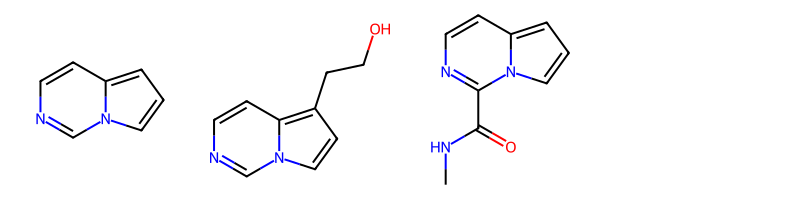

In [56]:
img = Draw.MolsToGridImage(
    [template] + ms,
    molsPerRow=4,  # Ìïú Ï§ÑÏóê 4Í∞úÏùò Î∂ÑÏûêÎ•º ÌëúÏãú
    subImgSize=(200, 200),  # Í∞Å Î∂ÑÏûê Ïù¥ÎØ∏ÏßÄÏùò ÌÅ¨Í∏∞
)

img

## 3D Íµ¨Ï°∞Î•º ÎãÆÏùÄ 2D Íµ¨Ï°∞ ÏÉùÏÑ±
- AllChem.GenerateDepictionMatching3DStructure() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Í∑∏ 3D Íµ¨Ï°∞Ïùò ÌòïÌÉúÎ•º ÏµúÎåÄÌïú Ïú†ÏßÄÌïòÎäî 2D Í∑∏Î¶ºÏùÑ ÏÉùÏÑ±Ìï† Ïàò ÏûàÎã§.

# 3D Íµ¨Ï°∞ ÏÉùÏÑ±
ÏàòÏÜå Ï∂îÍ∞Ä (AddHs): ÌòÑÏã§Ï†ÅÏù∏ Î∂ÑÏûê Íµ¨Ï°∞Î•º ÏñªÍ∏∞ ÏúÑÌï¥ Í∞ÄÏû• Î®ºÏ†Ä Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏàòÏÜå ÏõêÏûêÎ•º Ï∂îÍ∞ÄÌï¥Ïïº ÌïúÎã§.

3D Íµ¨Ï°∞ ÏÉùÏÑ± (EmbedMolecule): Î∂ÑÏûêÏùò 3D Ï¢åÌëúÎ•º ÏÉùÏÑ±. RDKitÏùÄ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ETKDG ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú Î≥ÑÎèÑÏùò ÏµúÏ†ÅÌôî ÏóÜÏù¥ÎèÑ ÏÉÅÎãπÌûà Ï†ïÌôïÌïú 3D Íµ¨Ï°∞Î•º ÏÉùÏÑ±

(ÏÑ†ÌÉù) Íµ¨Ï°∞ ÏµúÏ†ÅÌôî (MMFFOptimizeMolecule): ÏÉùÏÑ±Îêú 3D Íµ¨Ï°∞Î•º MMFF94ÎùºÎäî force field Ïù¥Ïö©Ìï¥ ÏóêÎÑàÏßÄÍ∞Ä Îçî ÎÇÆÏùÄ ÏïàÏ†ïÌïú ÏÉÅÌÉúÎ°ú ÎØ∏ÏÑ∏ Ï°∞Ï†ï(ÏµúÏ†ÅÌôî) Í∞ÄÎä•. ETKDG ÏïåÍ≥†Î¶¨Ï¶òÏùò ÏÑ±Îä•Ïù¥ Ï¢ãÏïÑÏÑú ÌïÑÏàòÍ∞Ä ÏïÑÎãàÎã§.

In [57]:
from rdkit import Chem
from rdkit.Chem import AllChem

m = Chem.MolFromSmiles('C1CCC1OC')

m2 = Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
AllChem.MMFFOptimizeMolecule(m2)

0

## Îã§Ï§ë 3D Íµ¨Ï°∞ ÏÉùÏÑ± Î∞è Î∂ÑÏÑù
Ïó¨Îü¨ Íµ¨Ï°∞ ÏÉùÏÑ± (EmbedMultipleConfs): numConfs Ïù∏ÏûêÎ•º ÏÇ¨Ïö©Ìï¥ ÏõêÌïòÎäî Í∞úÏàòÎßåÌÅºÏùò 3D Íµ¨Ï°∞Î•º ÏÉùÏÑ±.

Íµ¨Ï°∞ Ï†ïÎ†¨ (AlignMolConformers): ÏÉùÏÑ±Îêú Ïó¨Îü¨ Íµ¨Ï°∞Î•º ÎπÑÍµêÌïòÎ†§Î©¥, Î®ºÏ†Ä ÌïòÎÇòÏùò Í∏∞Ï§Ä Íµ¨Ï°∞Ïóê ÎßûÏ∂∞ Î™®Îëê Ï†ïÎ†¨Ìï¥Ïïº ÌïúÎã§..

Íµ¨Ï°∞ ÎπÑÍµê (GetConformerRMS): Ï†ïÎ†¨Îêú Îëê Íµ¨Ï°∞Í∞Ä ÏñºÎßàÎÇò Îã§Î•∏ÏßÄ RMSD(Root Mean Square Deviation) Í∞íÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ Ï†ïÎüâÏ†ÅÏúºÎ°ú ÎπÑÍµê Í∞ÄÎä•.

(ÏÑ†ÌÉù) Ï†ÑÏ≤¥ Íµ¨Ï°∞ ÏµúÏ†ÅÌôî (MMFFOptimizeMoleculeConfs): ÏÉùÏÑ±Îêú Î™®Îì† 3D Íµ¨Ï°∞Ïóê ÎåÄÌï¥ Ìïú Î≤àÏóê MMFF94 ÏµúÏ†ÅÌôîÎ•º ÏàòÌñâ.



In [58]:
cids = AllChem.EmbedMultipleConfs(m2,numConfs = 10)

rmslist = []
AllChem.AlignMolConformers(m2, RMSlist = rmslist)

rms = AllChem.GetConformerRMS(m2, 1, 9, prealigned = True)

res = AllChem.MMFFOptimizeMoleculeConfs(m2)

## ÏÑ±Îä• Ìñ•ÏÉÅ
numThreads Ïù∏ÏûêÎ•º ÏÑ§Ï†ïÌï¥ Î©ÄÌã∞Ïä§Î†àÎî©ÏúºÎ°ú ÏûëÏóÖ ÏÜçÎèÑÎ•º ÌÅ¨Í≤å Ìñ•ÏÉÅ.

In [59]:
cids = AllChem.EmbedMultipleConfs(m2, numConfs=10, numThreads=0)
res = AllChem.MMFFOptimizeMoleculeConfs(m2, numThreads=0)

3D Íµ¨Ï°∞ ÏÉùÏÑ±ÏùÄ Îß§Ïö∞ Î≥µÏû°Ìïú ÏûëÏóÖ. RDKitÏùò ETKDG Î∞©Î≤ïÏùÄ ÎåÄÎ∂ÄÎ∂ÑÏùò Î™©Ï†ÅÏóê Ï∂©Î∂ÑÌûà ÌõåÎ•≠Ìïú Í≤∞Í≥ºÎ•º Ï†úÍ≥µÌïòÏßÄÎßå, Îß§Ïö∞ Ï†ïÎ∞ÄÌïú ÌïôÏà† Ïó∞Íµ¨ÎÇò Ï†ÑÎ¨∏Ï†ÅÏù∏ conformational analysisÎ•º ÏúÑÌï¥ÏÑúÎäî Ï†ÑÏö© ÏÜåÌîÑÌä∏Ïõ®Ïñ¥Ïùò ÏÇ¨Ïö©Ïù¥ ÌïÑÏöîÌï† ÏàòÎèÑ ÏûàÎã§.

# Ï†ÄÏû• Î∞©Ïãù
- Î∂ÑÏûê Í∞ùÏ≤¥Î•º Ìõ®Ïî¨ Îπ†Î•¥Í≤å Î∂àÎü¨Ïò¨ Ïàò ÏûàÎäî Îëê Í∞ÄÏßÄ binary Ï†ÄÏû• Î∞©ÏãùÏùÑ Ï†úÍ≥µ

## ÌååÏù¥Ïç¨ ÌîºÌÅ¥(Pickle)
pickle.dumps(mol): Î∂ÑÏûê Í∞ùÏ≤¥Î•º ÌîºÌÅ¥ ÌòïÏãùÏùò Î∞îÏù¥Ìä∏(bytes)Î°ú Î≥ÄÌôò.

pickle.loads(pkl): ÌîºÌÅ¥ Î∞îÏù¥Ìä∏Î°úÎ∂ÄÌÑ∞ Î∂ÑÏûê Í∞ùÏ≤¥Î•º Îã§Ïãú Î≥µÏõê.



In [60]:
import pickle
from rdkit import Chem

m = Chem.MolFromSmiles('c1ccncc1')

# Î∂ÑÏûêÎ•º ÌîºÌÅ¥ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
pkl = pickle.dumps(m)

# ÌîºÌÅ¥Î°úÎ∂ÄÌÑ∞ Î∂ÑÏûê Î≥µÏõê
m2 = pickle.loads(pkl)
print(Chem.MolToSmiles(m2))
# 'c1ccncc1'

c1ccncc1


## RDKit ÏûêÏ≤¥ Î∞îÏù¥ÎÑàÎ¶¨ ÌòïÏãù ÏÇ¨Ïö©
mol.ToBinary(): Î∂ÑÏûê Í∞ùÏ≤¥Î•º RDKitÏùò ÏûêÏ≤¥ Î∞îÏù¥ÎÑàÎ¶¨ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

Chem.Mol(binStr): Î∞îÏù¥ÎÑàÎ¶¨ Î¨∏ÏûêÏó¥Î°úÎ∂ÄÌÑ∞ Î∂ÑÏûê Í∞ùÏ≤¥Î•º ÏÉùÏÑ±

In [61]:
# Î∂ÑÏûêÎ•º Î∞îÏù¥ÎÑàÎ¶¨ ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
binStr = m.ToBinary()

# Î∞îÏù¥ÎÑàÎ¶¨Î°úÎ∂ÄÌÑ∞ Î∂ÑÏûê Î≥µÏõê
m2 = Chem.Mol(binStr)
print(Chem.MolToSmiles(m2))
# 'c1ccncc1'

c1ccncc1


- Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∞òÎ≥µÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî Í≤ΩÏö∞, Ìïú Î≤à ÌååÏã±Ìïú ÌõÑ Í∑∏ Í≤∞Í≥ºÎ•º pickleÏù¥ÎÇò Î∞îÏù¥ÎÑàÎ¶¨ ÌååÏùºÎ°ú Ï†ÄÏû•Ìï¥ÎëêÍ≥† Îã§ÏùåÎ∂ÄÌÑ∞Îäî Í∑∏ ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÏãúÍ∞ÑÏùÑ ÌÅ¨Í≤å Ï†àÏïΩÌïòÎäî ÌïµÏã¨Ï†ÅÏù∏ ÏµúÏ†ÅÌôî Î∞©Î≤ï

# Drawing Molecules
## Í∏∞Î≥∏ Î∂ÑÏûê Í∑∏Î¶¨Í∏∞
- Draw.MolToFile(): Î∂ÑÏûê Í∞ùÏ≤¥ ÌïòÎÇòÎ•º Ïù¥ÎØ∏ÏßÄ ÌååÏùº(.png, .svg Îì±)Î°ú ÏßÅÏ†ë Ï†ÄÏû•
- Draw.MolsToGridImage(): Î∂ÑÏûê Î¶¨Ïä§Ìä∏Î•º Î∞õÏïÑ ÌïòÎÇòÏùò Í∑∏Î¶¨Îìú Ïù¥ÎØ∏ÏßÄ(PIL Image Í∞ùÏ≤¥)Î°ú Î∞òÌôò. Ïù¥ Í∞ùÏ≤¥Îäî ÌååÏùºÎ°ú Ï†ÄÏû•Ìï† Ïàò ÏûàÎã§.

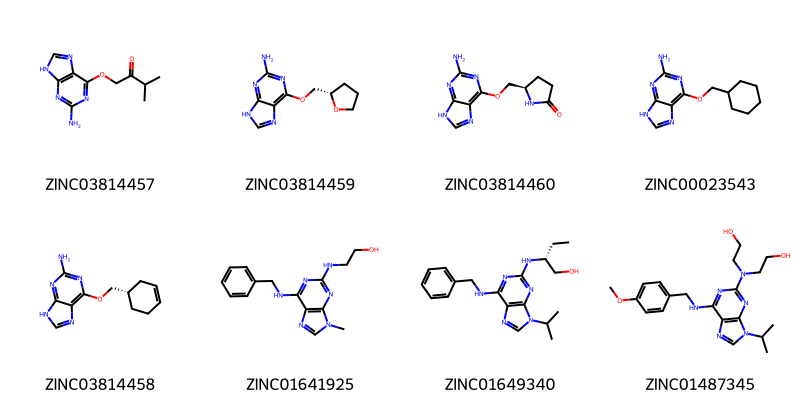

In [62]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from IPython.display import display

with Chem.SDMolSupplier('data/cdk2.sdf') as suppl:
  ms = [x for x in suppl if x is not None]
for m in ms:
  _ = AllChem.Compute2DCoords(m)

# Îã®Ïùº Î∂ÑÏûê Ï†ÄÏû•
Draw.MolToFile(ms[0], 'cdk2_mol1.png')

# Ïó¨Îü¨ Î∂ÑÏûê Í∑∏Î¶¨ÎìúÎ°ú ÎßåÎì§Ïñ¥ ÌååÏùº Ï†ÄÏû•
img = Draw.MolsToGridImage(ms[:8], molsPerRow=4, subImgSize=(200, 200),
                           legends=[x.GetProp("_Name") for x in ms[:8]])
display(img)
# img.save('cdk2_molgrid.png')Îäî Ïò§Î•ò Î∞úÏÉù

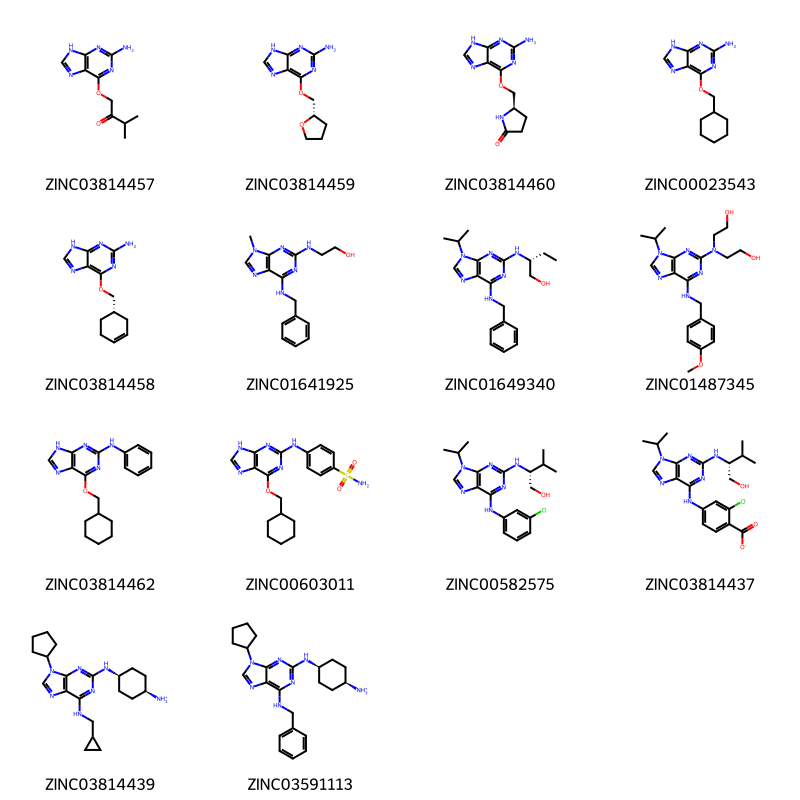

In [63]:
p = Chem.MolFromSmiles('[nH]1cnc2cncnc21')
subms = [x for x in ms if x.HasSubstructMatch(p)]
len(subms)
AllChem.Compute2DCoords(p)
for m in subms:
  _ = AllChem.GenerateDepictionMatching2DStructure(m,p)
img=Draw.MolsToGridImage(subms,molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in subms])
display(img)

## Íµ¨Ï°∞ Ï†ïÎ†¨ Î∞è Í∞ïÏ°∞
Í≥µÌÜµ Íµ¨Ï°∞Ïóê ÎßûÏ∂∞ Ï†ïÎ†¨: Ïó¨Îü¨ Î∂ÑÏûêÍ∞Ä Í≥µÌÜµÎêú Í≥®Í≤©(template)ÏùÑ Í∞ÄÏßà Îïå, GenerateDepictionMatching2DStructureÎ•º ÏÇ¨Ïö©Ìï¥ Í∑∏Î¶¨Í∏∞ Ï†ÑÏóê Î™®Îëê Í∞ôÏùÄ Î∞©Ìñ•ÏúºÎ°ú Ï†ïÎ†¨Ìï† Ïàò ÏûàÎã§. Ïù¥Îäî Íµ¨Ï°∞-ÌôúÏÑ± Í¥ÄÍ≥Ñ(SAR) Î∂ÑÏÑù Îì±ÏóêÏÑú Í∞ÄÎèÖÏÑ±ÏùÑ ÌÅ¨Í≤å ÎÜíÏó¨Ï§ÄÎã§.

ÌäπÏ†ï Íµ¨Ï°∞ Í∞ïÏ°∞: rdkit.Chem.Draw.rdMolDraw2D Î™®ÎìàÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥, substructure Í≤ÄÏÉâ Îì±ÏúºÎ°ú Ï∞æÏùÄ ÌäπÏ†ï ÏõêÏûê(atom)ÎÇò Í≤∞Ìï©(bond)Ïóê ÏÉâÍπîÏùÑ ÏûÖÌòÄ Í∞ïÏ°∞Ìï† Ïàò ÏûàÎã§. highlightAtomsÏôÄ highlightBonds Ïù∏ÏûêÏóê Í∞ïÏ°∞Ìï† ÏõêÏûê/Í≤∞Ìï©Ïùò Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏Î•º Ï†ÑÎã¨. highlightAtomColors, highlightBondColorsÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Í∞Å Î∂ÄÎ∂ÑÏùò ÏÉâÏÉÅÎèÑ ÏßÅÏ†ë ÏßÄÏ†ïÌï† Ïàò ÏûàÎã§.

In [64]:
from rdkit.Chem.Draw import rdMolDraw2D
# ÌäπÏ†ï Ìå®ÌÑ¥Ïóê Îß§ÏπòÎêòÎäî ÏõêÏûêÏôÄ Í≤∞Ìï©ÏùÑ Ï∞æÏïÑ ÌïòÏù¥ÎùºÏù¥Ìä∏ÌïòÍ∏∞
mol = Chem.MolFromSmiles('c1cc(F)ccc1Cl')
patt = Chem.MolFromSmarts('ClccccF')

hit_ats = list(mol.GetSubstructMatch(patt))
hit_bonds = []
for bond in patt.GetBonds():
   aid1 = hit_ats[bond.GetBeginAtomIdx()]
   aid2 = hit_ats[bond.GetEndAtomIdx()]
   hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

# # SVG ÎòêÎäî PNG Ï∫îÎ≤ÑÏä§ ÏÉùÏÑ±
d = rdMolDraw2D.MolDraw2DSVG(500, 500)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                   highlightBonds=hit_bonds)
d.FinishDrawing()

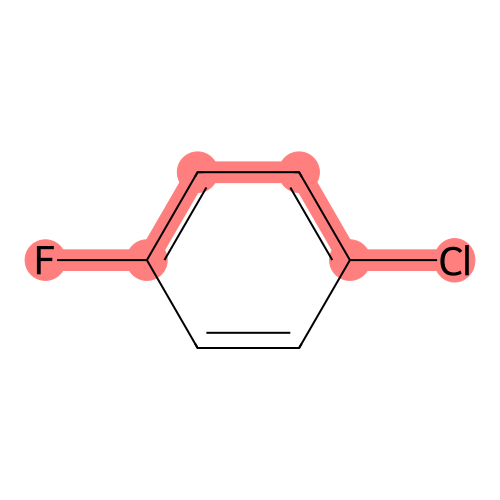

In [65]:
from IPython.display import SVG

# Get the SVG text from the drawing object and display it
svg_text = d.GetDrawingText()
display(SVG(svg_text))

In [66]:
# specify for individual atoms and bonds:
colours = [(0.8,0.0,0.8),(0.8,0.8,0),(0,0.8,0.8),(0,0,0.8)]
atom_cols = {}
for i, at in enumerate(hit_ats):
    atom_cols[at] = colours[i%4]
bond_cols = {}
for i, bd in enumerate(hit_bonds):
    bond_cols[bd] = colours[3 - i%4]

d = rdMolDraw2D.MolDraw2DCairo(500, 500)
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats,
                                   highlightAtomColors=atom_cols,
                                   highlightBonds=hit_bonds,
                                   highlightBondColors=bond_cols)

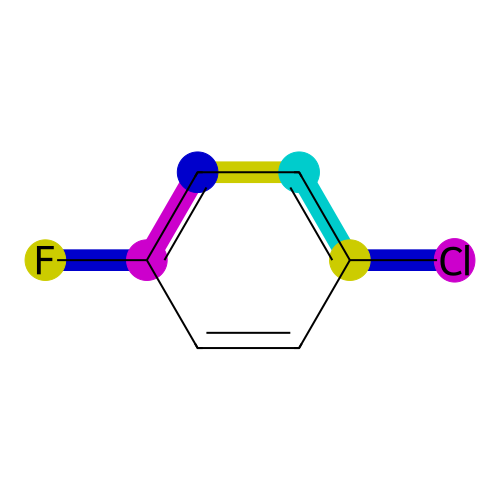

In [67]:
from IPython.display import Image, SVG

svg_text = d.GetDrawingText()
display(Image(svg_text))

## Ï£ºÏÑù Î∞è ÎùºÎ≤® Ï∂îÍ∞ÄÌïòÍ∏∞
ÏûêÎèô Ï£ºÏÑù: d.drawOptions()Î•º ÌÜµÌï¥ Ïπ¥Ïù¥ÎûÑ Ï§ëÏã¨Ïùò R/S, Ïù¥Ï§ë Í≤∞Ìï©Ïùò E/Z, ÏõêÏûê Î≤àÌò∏ Îì±ÏùÑ ÏûêÎèôÏúºÎ°ú Ï∂îÍ∞Ä.

ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÎÖ∏Ìä∏: ÏõêÏûêÎÇò Í≤∞Ìï©Ïóê atomNote, bondNote ÏÜçÏÑ±ÏùÑ ÏÑ§Ï†ïÌïòÏó¨ Í∞ÑÎã®Ìïú ÌÖçÏä§Ìä∏ ÎÖ∏Ìä∏Î•º Ï∂îÍ∞Ä.

ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÎùºÎ≤®: _displayLabel ÏÜçÏÑ±ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ R-Í∑∏Î£π ÏπòÌôòÍ∏∞Ï≤òÎüº ÏõêÏûêÎ•º ÏõêÌïòÎäî ÌÖçÏä§Ìä∏ ÎùºÎ≤®Î°ú ÎåÄÏ≤¥ Í∞ÄÎä•. Ïù¥ ÎùºÎ≤®ÏóêÎäî <sub>(ÏïÑÎûò Ï≤®Ïûê), <sup>(ÏúÑ Ï≤®Ïûê) ÌÉúÍ∑∏Î•º ÏÇ¨Ïö©Ìïú ÏÑúÏãù ÏßÄÏ†ïÎèÑ Í∞ÄÎä•.

In [68]:
mol = Chem.MolFromSmiles(r'Cl[C@H](F)NC\C=C\C')

# R-Í∑∏Î£π ÎùºÎ≤® ÏÑ§Ï†ï
mol.GetAtomWithIdx(0).SetProp("_displayLabel", "R<sub>1</sub>")

# Í∑∏Î¶¨Í∏∞ ÏòµÏÖò ÏÑ§Ï†ï
d = Draw.rdMolDraw2D.MolDraw2DCairo(250, 200)
d.drawOptions().addStereoAnnotation = True # R/S, E/Z Ï£ºÏÑù Ï∂îÍ∞Ä
d.drawOptions().addAtomIndices = True      # ÏõêÏûê Î≤àÌò∏ Ï∂îÍ∞Ä
d.DrawMolecule(mol)
d.FinishDrawing()
d.WriteDrawingText('annotated_molecule.png')

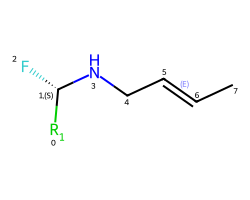

In [69]:
from IPython.display import Image, SVG

# Get the drawing text (PNG data from Cairo backend)
png_data = d.GetDrawingText()

# Display the PNG data using IPython.display.Image
display(Image(png_data))

In [70]:
smi = 'c1nc(*)ccc1* |$;;;R1;;;;R2$|'
mol = Chem.MolFromSmiles(smi)
mol.GetAtomWithIdx(3).GetProp("atomLabel")
'R1'
mol.GetAtomWithIdx(7).GetProp("atomLabel")
'R2'
d = rdMolDraw2D.MolDraw2DCairo(250, 250)
rdMolDraw2D.PrepareAndDrawMolecule(d,mol)
d.WriteDrawingText("./images/atom_labels_1.png")

[10:34:17] Failed to write PNG file ./images/atom_labels_1.png


## ÏõêÏûê ÎùºÎ≤® ÏÜçÏÑ± ÎπÑÍµê


# Metadata in Molecule Images Ïù¥ÎØ∏ÏßÄÏóêÏÑú Î∂ÑÏûê Î≥µÏõêÌïòÍ∏∞
## Îã®Ïùº Î∂ÑÏûê Î≥µÏõê
Chem.MolFromPNGString(): PNGÏóêÏÑú Î∂ÑÏûê Í∞ùÏ≤¥Î•º Î≥µÏõê

In [71]:
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
AllChem.Compute2DCoords(template)

0

In [72]:
ms = [Chem.MolFromSmiles(smi) for smi in ('OCCc1ccn2cnccc12','C1CC1Oc1cc2ccncn2c1','CNC(=O)c1nccc2cccn12')]
_ = [AllChem.GenerateDepictionMatching2DStructure(m,template) for m in ms]
d = rdMolDraw2D.MolDraw2DCairo(250, 200)
d.DrawMolecule(ms[0])
d.FinishDrawing()

In [73]:
# png Îç∞Ïù¥ÌÑ∞Î•º binaryÎ°ú ÏñªÍ∏∞
png = d.GetDrawingText()

In [74]:
# PNG binaryÎ°úÎ∂ÄÌÑ∞ Î∂ÑÏûê Í∞ùÏ≤¥ Î≥µÏõê
reconstructed_mol = Chem.MolFromPNGString(png)
Chem.MolToSmiles(reconstructed_mol)

'OCCc1c2ccncn2cc1'

## Ïó¨Îü¨ Î∂ÑÏûê Î≥µÏõê
Chem.MolsFromPNGString(): MolsToGridImageÎ°ú ÏÉùÏÑ±Îêú Í≤ÉÏ≤òÎüº Ïó¨Îü¨ Î∂ÑÏûêÍ∞Ä Ìè¨Ìï®Îêú Ïù¥ÎØ∏ÏßÄÏùò Î™®Îì† Î∂ÑÏûê Í∞ùÏ≤¥Î•º Î¶¨Ïä§Ìä∏Î°ú Ìïú Î≤àÏóê Î≥µÏõê

In [75]:
from rdkit.Chem import Draw

ms = [Chem.MolFromSmiles(s) for s in ('CCO', 'c1ccccc1')]

# returnPNG=True ÏòµÏÖòÏúºÎ°ú Í∑∏Î¶¨Îìú Ïù¥ÎØ∏ÏßÄÏùò PNG Î∞îÏù¥ÎÑàÎ¶¨ Îç∞Ïù¥ÌÑ∞ ÏñªÍ∏∞
png = Draw.MolsToGridImage(ms, returnPNG=True)

# PNGÎ°úÎ∂ÄÌÑ∞ Î∂ÑÏûê Î¶¨Ïä§Ìä∏ Î≥µÏõê
mols = Chem.MolsFromPNGString(png)
for mol in mols:
    print(Chem.MolToSmiles(mol))
# ÏóêÎü¨ Ïù¥Ïú†Î•º Î™®Î•¥Í≤†Îã§.

TypeError: No registered converter was able to produce a C++ rvalue of type std::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type Image

# Substructure Searching
- ÌäπÏ†ï Î∂ÑÏûê ÏïàÏóê ÏõêÌïòÎäî ÌôîÌïôÏ†Å Ìå®ÌÑ¥(substructure)Ïù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ Í≤ÄÏÉâÌïòÎäî Í∞ïÎ†•Ìïú Í∏∞Îä•ÏùÑ Ï†úÍ≥µ
- Ïù¥ Í≤ÄÏÉâ Ìå®ÌÑ¥ÏùÄ Ï£ºÎ°ú SMARTS Ïñ∏Ïñ¥Î°ú Ï†ïÏùò

##  Í∏∞Î≥∏ Í≤ÄÏÉâ Î∞©Î≤ï
mol.HasSubstructMatch(pattern): Î∂ÑÏûê(mol) ÏïàÏóê patternÏù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ Ïó¨Î∂ÄÎßå ÌôïÏù∏ÌïòÏó¨ True ÎòêÎäî FalseÎ•º Î∞òÌôò.

mol.GetSubstructMatch(pattern): Ï≤´ Î≤àÏß∏Î°ú Î∞úÍ≤¨Îêú matchÏóê Ìï¥ÎãπÌïòÎäî ÏõêÏûêÎì§Ïùò indexÎ•º tupleÎ°ú Î∞òÌôò.

mol.GetSubstructMatches(pattern): Í∞ÄÎä•Ìïú Î™®Îì† Îß§ÏπòÎ•º Ï∞æÏïÑ Í∞ÅÍ∞ÅÏùò ÏõêÏûê index tupleÎì§ÏùÑ Îã¥ÏùÄ tupleÏùÑ Î∞òÌôò.

In [76]:
# Í≤ÄÏÉâ ÎåÄÏÉÅ Î∂ÑÏûê (phenol)
m = Chem.MolFromSmiles('c1ccccc1O')
# Í≤ÄÏÉâÌï† Ìå®ÌÑ¥ (Î∞©Ìñ•Ï°±ÌÉÑÏÜå-Î∞©Ìñ•Ï°±ÌÉÑÏÜå-ÏÇ∞ÏÜå)
patt = Chem.MolFromSmarts('ccO')

# Ìå®ÌÑ¥Ïù¥ Ï°¥Ïû¨ÌïòÎäîÍ∞Ä?
print(m.HasSubstructMatch(patt))

# Ï≤´ Î≤àÏß∏ Îß§ÏπòÎäî? (0, 5, 6Î≤à ÏõêÏûêÍ∞Ä Îß§ÏπòÎê®)
print(m.GetSubstructMatch(patt))

# Î™®Îì† Îß§ÏπòÎäî? (Îëê Í∞ÄÏßÄ Í≤ΩÏö∞Í∞Ä Í∞ÄÎä•)
print(m.GetSubstructMatches(patt))

True
(0, 5, 6)
((0, 5, 6), (4, 5, 6))


## Î∂ÑÏûê Î¶¨Ïä§Ìä∏ ÌïÑÌÑ∞ÎßÅ
SDF ÌååÏùºÍ≥º Í∞ôÏùÄ Î∂ÑÏûê Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ÏóêÏÑú ÏõêÌïòÎäî Î∂ÄÎ∂Ñ Íµ¨Ï°∞Î•º Í∞ÄÏßÑ Î∂ÑÏûêÎì§Îßå ÌïÑÌÑ∞ÎßÅ

In [77]:
# 'c[NH1]' (ÏßÄÎ∞©Ï°± ÌÉÑÏÜåÏóê Ïó∞Í≤∞Îêú 2Ï∞® ÏïÑÎØº) Ìå®ÌÑ¥ Ï†ïÏùò
patt = Chem.MolFromSmarts('c[NH1]')

# SD ÌååÏùºÏóêÏÑú Ìå®ÌÑ¥ÏùÑ Ìè¨Ìï®ÌïòÎäî Î∂ÑÏûêÎßå matches Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•
with Chem.SDMolSupplier('data/actives_5ht3.sdf') as suppl:
  matches = [mol for mol in suppl if mol.HasSubstructMatch(patt)]

len(matches)

22

## SMARTS vs. SMILES ÏøºÎ¶¨
SMILES ÏøºÎ¶¨: ÏõêÏûêÏùò Ï¢ÖÎ•òÏôÄ Ïó∞Í≤∞ÏÑ±Îßå ÏùºÏπòÌïòÎ©¥ match. aromatic Ïó¨Î∂Ä Îì±ÏùÑ Íµ¨Î∂ÑÌïòÏßÄ ÏïäÏïÑ Îçî ÏùºÎ∞òÏ†ÅÏù∏ Í≤ÄÏÉâ.

SMARTS ÏøºÎ¶¨: ÏõêÏûêÏùò Ï¢ÖÎ•òÎøêÎßå ÏïÑÎãàÎùº, aliphatic(ÏßÄÎ∞©Ï°±)/aromatic, Í≤∞Ìï© Ï∞®Ïàò Îì± Îçî Ï†ïÍµêÌïòÍ≥† ÏóÑÍ≤©Ìïú Ï°∞Í±¥ÏúºÎ°ú Í≤ÄÏÉâ

- SMARTSÎ•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÌëúÏ§ÄÏ†ÅÏù¥Í≥† Í∂åÏû•ÎêòÎäî Î∞©Î≤ï



In [78]:
m = Chem.MolFromSmiles('C1=CC=CC=C1OC') # Anisole

# SMILES ÏøºÎ¶¨: 'COC' (ÌÉÑÏÜå-ÏÇ∞ÏÜå-ÌÉÑÏÜå)
# AnisoleÏùò C(Î∞©Ìñ•Ï°±)-O-C(ÏßÄÎ∞©Ï°±)ÎèÑ Îß§ÏπòÎê®
m.HasSubstructMatch(Chem.MolFromSmiles('COC'))

True

In [79]:
# SMARTS ÏøºÎ¶¨: 'COC' (ÏßÄÎ∞©Ï°±ÌÉÑÏÜå-ÏÇ∞ÏÜå-ÏßÄÎ∞©Ï°±ÌÉÑÏÜå)
# AnisoleÏùò ÌïúÏ™Ω ÌÉÑÏÜåÎäî Î∞©Ìñ•Ï°±Ïù¥ÎØÄÎ°ú Îß§ÏπòÎêòÏßÄ ÏïäÏùå
m.HasSubstructMatch(Chem.MolFromSmarts('COC'))

False

In [80]:
# SMARTS ÏøºÎ¶¨: 'COc' (ÏßÄÎ∞©Ï°±ÌÉÑÏÜå-ÏÇ∞ÏÜå-Î∞©Ìñ•Ï°±ÌÉÑÏÜå)
# Anisole Íµ¨Ï°∞ÏôÄ Ï†ïÌôïÌûà ÏùºÏπòÌïòÎØÄÎ°ú Îß§ÏπòÎê®
m.HasSubstructMatch(Chem.MolFromSmarts('COc'))

True

## Stereochemistry in substructure matches
Í∏∞Î≥∏ ÎèôÏûë: ÏûÖÏ≤¥ÌôîÌïô Î¨¥Ïãú
- ÏòµÏÖòÏù¥ ÏóÜÏúºÎ©¥ Í≤ÄÏÉâÏùÄ 2D Ïó∞Í≤∞ÏÑ±ÏóêÎßå Ï¥àÏ†ê



In [81]:
from rdkit import Chem

# ÌäπÏ†ï Ïπ¥Ïù¥ÎûÑ Ï§ëÏã¨ÏùÑ Í∞ÄÏßÑ Î∂ÑÏûê
m = Chem.MolFromSmiles('CC[C@H](F)Cl')

# ÎèôÏùºÌïú, Î∞òÎåÄÏùò, ÎπÑÏπ¥Ïù¥ÎûÑ ÏøºÎ¶¨ Î™®Îëê TrueÎ•º Î∞òÌôò
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'))  # True
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl')) # True
m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'))

True

## useChirality=True ÏòµÏÖò: ÏûÖÏ≤¥ÌôîÌïô Í≥†Î†§
- Ïπ¥Ïù¥ÎûÑ Ï§ëÏã¨Ïùò ÏûÖÏ≤¥ Î∞∞Ïó¥ÍπåÏßÄ Ï†ïÌôïÌïòÍ≤å ÏùºÏπòÌï¥Ïïº ÌïúÎã§.

In [82]:
# ÎèôÏùºÌïú ÏûÖÏ≤¥ÌôîÌïôÏùÑ Í∞ÄÏßÑ ÏøºÎ¶¨Îäî Îß§ÏπòÎê®
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'), useChirality=True)

True

In [83]:
# Î∞òÎåÄÏùò ÏûÖÏ≤¥ÌôîÌïôÏùÑ Í∞ÄÏßÑ ÏøºÎ¶¨Îäî Îß§ÏπòÎêòÏßÄ ÏïäÏùå
m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'), useChirality=True)

False

## ÎπÑÎåÄÏπ≠ Îß§Ïπ≠ Í∑úÏπô
useChirality=True ÏÇ¨Ïö© Ïãú Ìïú Í∞ÄÏßÄ Ï§ëÏöîÌïú ÎπÑÎåÄÏπ≠ Í∑úÏπô
1.  ÎπÑÏπ¥Ïù¥ÎûÑ(non-chiral) ÏøºÎ¶¨Îäî Ïπ¥Ïù¥ÎûÑ(chiral) Î∂ÑÏûêÎ•º Ï∞æÏùÑ Ïàò ÏûàÎã§.
- ÏøºÎ¶¨Ïóê ÏûÖÏ≤¥ÌôîÌïô Ï†ïÎ≥¥Í∞Ä ÏóÜÏúºÎ©¥, Ïù¥Îäî "ÏûÖÏ≤¥ÌôîÌïôÏùÄ ÏÉÅÍ¥ÄÏóÜÎã§"Îäî ÏùòÎØ∏Î°ú ÏûëÏö©ÌïòÏó¨ Îçî Íµ¨Ï≤¥Ï†ÅÏù∏ ÎåÄÏÉÅ(Ïπ¥Ïù¥ÎûÑ Î∂ÑÏûê)Í≥º Îß§ÏπòÎê† Ïàò ÏûàÎã§.

In [84]:
# ÎπÑÏπ¥Ïù¥ÎûÑ ÏøºÎ¶¨ 'CC(F)Cl'Îäî Ïπ¥Ïù¥ÎûÑ Î∂ÑÏûê mÍ≥º Îß§ÏπòÎê®
m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'), useChirality=True)

True

2. Ïπ¥Ïù¥ÎûÑ(chiral) ÏøºÎ¶¨Îäî ÎπÑÏπ¥Ïù¥ÎûÑ(non-chiral) Î∂ÑÏûêÎ•º Ï∞æÏùÑ Ïàò ÏóÜÎã§.
- ÏøºÎ¶¨Í∞Ä ÌäπÏ†ï ÏûÖÏ≤¥ÌôîÌïôÏùÑ ÏöîÍµ¨ÌïòÎäîÎç∞, ÎåÄÏÉÅ Î∂ÑÏûêÏóê Ìï¥Îãπ Ï†ïÎ≥¥Í∞Ä ÏïÑÏòà ÏóÜÏúºÎ©¥ Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÏãúÌÇ¨ Ïàò ÏóÜÏñ¥ Îß§ÏπòÏóê Ïã§Ìå®

In [85]:
# ÎπÑÏπ¥Ïù¥ÎûÑ Î∂ÑÏûê
m2 = Chem.MolFromSmiles('CCC(F)Cl')
# Ïπ¥Ïù¥ÎûÑ ÏøºÎ¶¨Îäî ÎπÑÏπ¥Ïù¥ÎûÑ Î∂ÑÏûê m2ÏôÄ Îß§ÏπòÎêòÏßÄ ÏïäÏùå
m2.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'), useChirality=True)

False

## Atom Map Indices in SMARTS
- Î≥µÏû°Ìïú Í≤ÄÏÉâ Ìå®ÌÑ¥ ÎÇ¥Ïùò ÌäπÏ†ï ÏõêÏûêÎì§ÏùÑ "ÌÉúÍ∑∏"ÌïòÍ±∞ÎÇò "Î∂ÅÎßàÌÅ¨"ÌïòÎäî Îç∞ ÏÇ¨Ïö©
- Ï†ÑÏ≤¥ Ìå®ÌÑ¥Ïù¥ Îß§ÏπòÎêòÏóàÏùÑ Îïå, ÎÇ¥Í∞Ä Í¥ÄÏã¨ ÏûàÎäî ÌäπÏ†ï ÏõêÏûêÎì§Ïù¥ Ïñ¥Îñ§ Í≤ÉÏù∏ÏßÄ ÏâΩÍ≤å ÏãùÎ≥Ñ Í∞ÄÎä•

### Atom Map Indices
SMARTS Ìå®ÌÑ¥ ÎÇ¥ÏóêÏÑú ÏΩúÎ°†(:)Í≥º Ïà´ÏûêÎ•º ÏÇ¨Ïö©Ìï¥ ÏõêÏûêÏóê Î≤àÌò∏Î•º Î∂ôÏù¥Îäî Í∏∞Îä•
- ÏòàÎ•º Îì§Ïñ¥, [cH0:1][c:2]ÏóêÏÑú Ï≤´ Î≤àÏß∏ ÌÉÑÏÜåÎäî 1Î≤à, Îëê Î≤àÏß∏ ÌÉÑÏÜåÎäî 2Î≤àÏúºÎ°ú ÌÉúÍ∑∏

### ÏÇ¨Ïö©Î≤ï 2Îã®Í≥Ñ ÏõåÌÅ¨ÌîåÎ°úÏö∞
GetSubstructMatches()Îäî Ìå®ÌÑ¥Ïùò Î™®Îì† Ïö∞ÎÑàÏûêÏóê ÎåÄÌïú matching indexÎ•º Î∞òÌôòÌïòÎØÄÎ°ú, tagÎêú ÏõêÏûêÎì§Ïùò indexÎßå Í≥®ÎùºÎÇ¥Î†§Î©¥ 2Îã®Í≥ÑÍ∞Ä ÌïÑÏöîÌïòÎã§.

### 1Îã®Í≥Ñ: Ìå®ÌÑ¥ÏóêÏÑú ÎßµÌïë Ï†ïÎ≥¥ Ï∂îÏ∂úÌïòÍ∏∞
Î∂ÄÎ∂Ñ Íµ¨Ï°∞ Í≤ÄÏÉâÏùÑ ÏàòÌñâÌïòÍ∏∞ Ï†Ñ, Î®ºÏ†Ä SMARTS Ìå®ÌÑ¥ ÏûêÏ≤¥Î•º Î∂ÑÏÑùÌïòÏó¨ "Îßµ Î≤àÌò∏"ÏôÄ "Ìå®ÌÑ¥ ÎÇ¥ ÏõêÏûê Ïù∏Îç±Ïä§" ÏÇ¨Ïù¥Ïùò Í¥ÄÍ≥ÑÎ•º ÌååÏïÖ

In [86]:
# 1, 2, 3, 4Î≤àÏúºÎ°ú ÌÉúÍ∑∏Îêú ÏõêÏûêÍ∞Ä Ìè¨Ìï®Îêú SMARTS Ìå®ÌÑ¥
qmol = Chem.MolFromSmarts('[cH0:1][c:2]([cH0])!@[CX3!r:3]=[NX2!r:4]')

# Îßµ Î≤àÌò∏ -> Ìå®ÌÑ¥ ÎÇ¥ ÏõêÏûê Ïù∏Îç±Ïä§Î°úÏùò ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
ind_map = {}
for atom in qmol.GetAtoms():
  map_num = atom.GetAtomMapNum() # ÏõêÏûêÏùò Îßµ Î≤àÌò∏ Í∞ÄÏ†∏Ïò§Í∏∞
  if map_num:
    ind_map[map_num] = atom.GetIdx()

# Îßµ Î≤àÌò∏(1, 2, 3, 4) ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨Îêú ÏõêÏûê Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
# Ïù¥ Î¶¨Ïä§Ìä∏Îäî ÎÇòÏ§ëÏóê Îß§Ïπò Í≤∞Í≥ºÎ•º ÌïÑÌÑ∞ÎßÅÌïòÎäî Îç∞ ÏÇ¨Ïö©
map_list = [ind_map[x] for x in sorted(ind_map)]
map_list

[0, 1, 3, 4]

### 2Îã®Í≥Ñ: Îß§ÏπòÎêú ÏõêÏûê Ïù∏Îç±Ïä§ ÏÑ†ÌÉù
map_listÎ•º ÏÇ¨Ïö©Ìï¥ Ïã§Ï†ú Î∂ÑÏûêÏôÄÏùò Îß§Ïπò Í≤∞Í≥ºÏóêÏÑú Ïö∞Î¶¨Í∞Ä ÌÉúÍ∑∏ÌñàÎçò ÏõêÏûêÎì§Ïùò Ïù∏Îç±Ïä§Îßå ÏàúÏÑúÎåÄÎ°ú Í≥®ÎùºÎÇº Ïàò ÏûàÎã§.

In [87]:
mol = Chem.MolFromSmiles('Cc1cccc(C)c1C(C)=NC')

# GetSubstructMatchesÎ°ú Î™®Îì† Í∞ÄÎä•Ìïú Îß§ÏπòÎ•º Ï∞æÏùå
for match in mol.GetSubstructMatches(qmol):
    # match ÌäúÌîåÏóêÏÑú map_listÏóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§Îßå Ï∂îÏ∂ú
    # match -> (1, 2, 6, 7, 8, 10) Í≥º Í∞ôÏùÄ Ï†ÑÏ≤¥ Îß§Ïπò Í≤∞Í≥º
    tagged_atoms = [match[i] for i in map_list]
    print(tagged_atoms)
# ÌÉúÍ∑∏Îêú ÏõêÏûêÎì§Ïóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§Í∞Ä Ï∂úÎ†•

[1, 7, 8, 10]


## Advanced substructure matching
### ÌïµÏã¨ Í∞úÎÖê: Ï∂îÍ∞Ä ÏµúÏ¢Ö Í≤ÄÏÇ¨ (Extra Final Check)
SMARTSÎäî Îß§Ïö∞ Í∞ïÎ†•ÌïòÏßÄÎßå, "Ïù¥ ÏπòÌôòÍ∏∞Ïóê ÏûàÎäî Î™®Îì† ÏõêÏûêÎäî ÌÉÑÏÜåÏó¨Ïïº ÌïúÎã§"ÏôÄ Í∞ôÏùÄ ÎèôÏ†ÅÏù∏ Í∑úÏπôÏùÑ ÌëúÌòÑÌïòÍ∏∞Îäî Ïñ¥Î†µÎã§.

SubstructMatchParameters Í∞ùÏ≤¥ÏôÄ setExtraFinalCheck() Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÎ©¥, SMARTSÍ∞Ä Ï∞æÏïÑÎÇ∏ Í∞ÅÍ∞ÅÏùò Ïû†Ïû¨Ï†ÅÏù∏ Îß§ÏπòÏóê ÎåÄÌï¥ ÏÇ¨Ïö©ÏûêÍ∞Ä ÏßÅÏ†ë ÎßåÎì† ÌååÏù¥Ïç¨ Ìï®Ïàò(checker)Î•º Ïã§ÌñâÌïòÏó¨ Îß§ÏπòÎ•º ÏµúÏ¢Ö ÏäπÏù∏ÌïòÍ±∞ÎÇò Í±∞Î∂ÄÌï† Ïàò ÏûàÎã§.

### ÏûëÎèô Î∞©Ïãù
RDKitÏù¥ SMARTS Ìå®ÌÑ¥Í≥º ÏùºÏπòÌïòÎäî Î∂ÄÎ∂Ñ Íµ¨Ï°∞Î•º Ï∞æÎäîÎã§.

Ï∞æÏùÄ Îß§Ïπò Ï†ïÎ≥¥(Î∂ÑÏûê Í∞ùÏ≤¥, Îß§ÏπòÎêú ÏõêÏûê Ïù∏Îç±Ïä§)Î•º ÏÇ¨Ïö©Ïûê Ï†ïÏùò Í≤ÄÏÇ¨Í∏∞ Ìï®ÏàòÏóê Ï†ÑÎã¨ÌïúÎã§.

Í≤ÄÏÇ¨Í∏∞ Ìï®ÏàòÍ∞Ä TrueÎ•º Î∞òÌôòÌïòÎ©¥ Ìï¥Îãπ Îß§ÏπòÎ•º ÏµúÏ¢Ö Í≤∞Í≥ºÏóê Ìè¨Ìï®ÌïòÍ≥†, FalseÎ•º Î∞òÌôòÌïòÎ©¥ Î≤ÑÎ¶∞Îã§.

### ÏÇ¨Ïö© Î∞©Î≤ï
1. Í≤ÄÏÇ¨Í∏∞(Checker) Ï†ïÏùò: (molecule, match_indices)Î•º Ïù∏ÏûêÎ°ú Î∞õÍ≥†, True ÎòêÎäî FalseÎ•º Î∞òÌôòÌïòÎäî Ìï®ÏàòÎÇò Ìò∏Ï∂ú Í∞ÄÎä•Ìïú ÌÅ¥ÎûòÏä§Î•º ÏÉùÏÑ±

2. SubstructMatchParameters ÏÑ§Ï†ï: Chem.SubstructMatchParameters()Î°ú ÌååÎùºÎØ∏ÌÑ∞ Í∞ùÏ≤¥Î•º ÎßåÎì§Í≥†, params.setExtraFinalCheck(checker)Î•º ÌÜµÌï¥ ÏúÑÏóêÏÑú ÎßåÎì† Í≤ÄÏÇ¨Í∏∞Î•º Îì±Î°ù

3. Í≤ÄÏÉâ Ïã§Ìñâ: GetSubstructMatches(pattern, params)Ï≤òÎüº Í≤ÄÏÉâ Ìï®ÏàòÏóê ÌååÎùºÎØ∏ÌÑ∞ Í∞ùÏ≤¥Î•º Ìï®Íªò Ï†ÑÎã¨

### Î™©Ìëú
C1CCC1* (ÏÇ¨Ïù¥ÌÅ¥Î°úÎ∑∞ÌÖåÏù∏ Í≥†Î¶¨Ïóê Î¨¥Ïñ∏Í∞Ä Î∂ôÏñ¥ÏûàÎäî Íµ¨Ï°∞) Ìå®ÌÑ¥ÏùÑ Í≤ÄÏÉâÌïòÎêò, *Ïóê Ïó∞Í≤∞Îêú ÏπòÌôòÍ∏∞(sidechain)Í∞Ä ÌäπÏ†ï Ï°∞Í±¥ÏùÑ ÎßåÏ°±ÌïòÎäî Í≤ΩÏö∞Îßå Ï∞æÏïÑÎÇ∏Îã§.



### SidechainChecker ÌÅ¥ÎûòÏä§: Í≤ÄÏÇ¨Í∏∞ Ïó≠Ìï†

Ï¥àÍ∏∞Ìôî(__init__) Ïãú, Í≤ÄÏÉâ Ìå®ÌÑ¥(p)ÏóêÏÑú queryTypeÏù¥ÎùºÎäî ÏÜçÏÑ±ÏùÑ Í∞ÄÏßÑ ÏõêÏûê(*)Î•º Ï∞æÏïÑ Ïñ¥Îñ§ Í∑úÏπô('all_carbon' ÎòêÎäî 'alkyl')ÏùÑ Ï†ÅÏö©Ìï†ÏßÄ Í∏∞Ïñµ

Ìò∏Ï∂ú(__call__) Ïãú, SMARTS Îß§ÏπòÍ∞Ä Î∞úÍ≤¨Îê† ÎïåÎßàÎã§ Ïã§ÌñâÎê©ÎãàÎã§. Îß§ÏπòÎêú ÏõêÏûêÎì§ Ï§ë *Ïóê Ìï¥ÎãπÌïòÎäî ÏõêÏûêÎ°úÎ∂ÄÌÑ∞ ÏãúÏûëÌïòÏó¨, Ïó∞Í≤∞Îêú ÏπòÌôòÍ∏∞ Ï†ÑÏ≤¥Î•º ÌÉêÏÉâ

ÌÉêÏÉâÌïòÎ©¥ÏÑú ÏπòÌôòÍ∏∞Ïùò Î™®Îì† ÏõêÏûêÍ∞Ä Ï£ºÏñ¥ÏßÑ Í∑úÏπô(Ïòà: 'Î™®Îì† ÏõêÏûêÍ∞Ä ÌÉÑÏÜåÏù∏Í∞Ä?')ÏùÑ ÎßåÏ°±ÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÍ≥†, ÌïòÎÇòÎùºÎèÑ ÎßåÏ°±ÌïòÏßÄ ÏïäÏúºÎ©¥ FalseÎ•º Î∞òÌôòÌïòÏó¨ Ìï¥Îãπ Îß§ÏπòÎ•º ÌÉàÎùΩ

In [88]:
from rdkit import Chem

class SidechainChecker(object):
  matchers = {
    'alkyl': lambda at: not at.GetIsAromatic(),
    'all_carbon': lambda at: at.GetAtomicNum() == 6
  }

  def __init__(self, query, pName="queryType"):
    # identify the atoms that have the properties we care about
    self._atsToExamine = [(x.GetIdx(), x.GetProp(pName)) for x in query.GetAtoms()
                          if x.HasProp(pName)]
    self._pName = pName

  def __call__(self, mol, vect):
    seen = [0] * mol.GetNumAtoms()
    for idx in vect:
      seen[idx] = 1
    # loop over the atoms we care about:
    for idx, qtyp in self._atsToExamine:
      midx = vect[idx]
      stack = [midx]
      atom = mol.GetAtomWithIdx(midx)
      # now do a breadth-first search from that atom, checking
      # all of its neighbors that aren't in the substructure
      # query:
      stack = [atom]
      while stack:
        atom = stack.pop(0)
        if not self.matchers[qtyp](atom):
          return False
        seen[atom.GetIdx()] = 1
        for nbr in atom.GetNeighbors():
          if not seen[nbr.GetIdx()]:
            stack.append(nbr)
    return True

In [89]:
# Í∏∞Î≥∏ Í≤ÄÏÉâ: C1CCC1* Ìå®ÌÑ¥Ïóê ÎßûÎäî Î™®Îì† Í≤ΩÏö∞Î•º Ï∞æÏäµÎãàÎã§.
m = Chem.MolFromSmiles('C2NCC2CC1C(CCCC)C(OCCCC)C1c2ccccc2')
p = Chem.MolFromSmarts('C1CCC1*')
p.GetAtomWithIdx(4).SetProp("queryType", "all_carbon")
m.GetSubstructMatches(p)

((5, 6, 11, 17, 18), (5, 17, 11, 6, 7), (6, 5, 17, 11, 12), (6, 11, 17, 5, 4))

In [90]:
# all_carbon Í≤ÄÏÇ¨ Ï†ÅÏö©: Ïó∞Í≤∞Îêú ÏπòÌôòÍ∏∞Ïùò Î™®Îì† ÏõêÏûêÍ∞Ä ÌÉÑÏÜåÏù∏ Í≤ΩÏö∞Îßå ÎÇ®Í∏¥Îã§. (Ïòà: OCCCCÎÇò c2ccccc2 ÏπòÌôòÍ∏∞Îäî ÌÉàÎùΩ)
params = Chem.SubstructMatchParameters()
checker = SidechainChecker(p)
params.setExtraFinalCheck(checker)
m.GetSubstructMatches(p,params)

((5, 6, 11, 17, 18), (5, 17, 11, 6, 7))

In [91]:
# alkyl Í≤ÄÏÇ¨ Ï†ÅÏö©: ÏπòÌôòÍ∏∞Ïùò Î™®Îì† ÏõêÏûêÍ∞Ä Î∞©Ìñ•Ï°±Ïù¥ ÏïÑÎãå Í≤ΩÏö∞Îßå ÎÇ®Í∏¥Îã§. (Ïòà: CCCCÎÇò OCCCCÎäî ÌÜµÍ≥º, c2ccccc2Îäî ÌÉàÎùΩ)
p.GetAtomWithIdx(4).SetProp("queryType", "alkyl")
checker = SidechainChecker(p)
params.setExtraFinalCheck(checker)
m.GetSubstructMatches(p,params)

((5, 17, 11, 6, 7), (6, 5, 17, 11, 12), (6, 11, 17, 5, 4))

# Chemical Transformations
## Î∂ÄÎ∂Ñ Íµ¨Ï°∞ Í∏∞Î∞ò Î≥ÄÌòï
AllChem.DeleteSubstructs(mol, patt): Î∂ÑÏûê(mol)ÏóêÏÑú Ìå®ÌÑ¥(patt)Í≥º ÏùºÏπòÌïòÎäî Î∂ÄÎ∂Ñ Íµ¨Ï°∞Î•º ÏÇ≠Ï†úÌï©ÎãàÎã§.

AllChem.ReplaceSubstructs(mol, patt, repl): Ìå®ÌÑ¥(patt)Í≥º ÏùºÏπòÌïòÎäî Î∂ÄÎ∂ÑÏùÑ Îã§Î•∏ Î∂ÑÏûê(repl)Î°ú ÍµêÏ≤¥Ìï©ÎãàÎã§.

Chem.ReplaceSidechains(mol, core): Í∏∞Ï§ÄÏù¥ ÎêòÎäî ÏΩîÏñ¥(core) Íµ¨Ï°∞Î•º ÎÇ®Í∏∞Í≥†, ÎÇòÎ®∏ÏßÄ Í≥ÅÍ∞ÄÏßÄ(sidechain)Îì§ÏùÑ Ï†úÍ±∞Ìïú ÌõÑ Ïó∞Í≤∞ ÏßÄÏ†êÏùÑ [*]Î°ú ÌëúÏãúÌï©ÎãàÎã§.

Chem.ReplaceCore(mol, core): ReplaceSidechainsÏôÄ Î∞òÎåÄÎ°ú, ÏΩîÏñ¥(core)Î•º Ï†úÍ±∞ÌïòÍ≥† Í≥ÅÍ∞ÄÏßÄÎì§Îßå [*]ÏôÄ Ìï®Íªò ÎÇ®ÍπÅÎãàÎã§. GetMolFrags() Ìï®ÏàòÏôÄ Ìï®Íªò ÏÇ¨Ïö©ÌïòÎ©¥ Í∞Å Í≥ÅÍ∞ÄÏßÄÎ•º Í∞úÎ≥Ñ Î∂ÑÏûêÎ°ú Î∂ÑÎ¶¨

In [92]:
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('C(=O)[OH]')
rm = AllChem.DeleteSubstructs(m,patt)
Chem.MolToSmiles(rm)

'C'

In [93]:
# pattÏôÄ ÏùºÏπòÌïòÎäî Î∂ÄÎ∂ÑÏùÑ Îã§Î•∏ Î∂ÑÏûêÎ°ú ÍµêÏ≤¥
repl = Chem.MolFromSmiles('OC')
patt = Chem.MolFromSmarts('[$(NC(=O))]')
m = Chem.MolFromSmiles('CC(=O)N')
rms = AllChem.ReplaceSubstructs(m,patt,repl)
Chem.MolToSmiles(rms[0])

'COC(C)=O'

In [94]:
# Í∏∞Ï§ÄÏù¥ ÎêòÎäî coreÎ•º ÎÇ®Í∏∞Í≥† ÎÇòÎ®∏ÏßÄ sidechainÏ†úÍ±∞ Ìïú ÌõÑ Ïó∞Í≤∞ ÏßÄÏ†ê ÌëúÏãú
m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp = Chem.ReplaceSidechains(m1,core)
Chem.MolToSmiles(tmp)

'[1*]c1cncnc1[2*]'

In [95]:
# coreÎ•º Ï†úÍ±∞ÌïòÍ≥† sidechainÎì§Îßå ÎÇ®Í∏¥Îã§.
tmp = Chem.ReplaceCore(m1,core)
Chem.MolToSmiles(tmp)
'[1*]CCBr.[2*]C(=O)O'

'[1*]CCBr.[2*]C(=O)O'

In [96]:
# Î∂ÑÎ¶¨Îêú sidechainÎì§ÏùÑ Í∞úÎ≥Ñ Î∂ÑÏûêÎ°ú ÏñªÍ∏∞
rs = Chem.GetMolFrags(tmp, asMols=True)
Chem.MolToSmiles(rs[0])

'[1*]CCBr'

## Murcko Decomposition
Î∂ÑÏûêÏùò ÌïµÏã¨ Í≥®Í≤© Íµ¨Ï°∞Î•º Ï∂îÏ∂úÌïòÎäî Murcko Î∂ÑÌï¥ Í∏∞Îä•

MurckoScaffold.GetScaffoldForMol(mol): Î∂ÑÏûêÏóêÏÑú Î™®Îì† sidechainÏùÑ Ï†úÍ±∞ÌïòÍ≥†, ring Íµ¨Ï°∞ÏôÄ ring ÏÇ¨Ïù¥Î•º ÏûáÎäî linkerÎßåÏúºÎ°ú Íµ¨ÏÑ±Îêú Murcko ScaffoldÎ•º ÏÉùÏÑ±ÌïúÎã§.

MurckoScaffold.MakeScaffoldGeneric(scaffold): Ï∂îÏ∂úÎêú scaffoldÎ•º Î™®Îì† ÏõêÏûêÎäî ÌÉÑÏÜåÎ°ú, Î™®Îì† Í≤∞Ìï©ÏùÄ Îã®Ïùº Í≤∞Ìï©ÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏàúÏàòÌïú Í∑∏ÎûòÌîÑ Í≥®Í≤©(framework)Îßå ÎÇ®Í∏¥Îã§.

In [97]:
from rdkit.Chem.Scaffolds import MurckoScaffold

m = Chem.MolFromSmiles('Cc1c(N)cccc1C(=O)O')

# Murcko Scaffold Ï∂îÏ∂ú
core = MurckoScaffold.GetScaffoldForMol(m)
Chem.MolToSmiles(core)

'c1ccccc1'

In [98]:
# Generic FrameworkÏúºÎ°ú Î≥ÄÌôò
fw = MurckoScaffold.MakeScaffoldGeneric(core)
Chem.MolToSmiles(fw)

'C1CCCCC1'

## ÏµúÎåÄ Í≥µÌÜµ Î∂ÄÎ∂Ñ Íµ¨Ï°∞ (MCS)

Maximum Common Substructure
Îëê Í∞ú Ïù¥ÏÉÅÏùò Î∂ÑÏûê Í∞ÑÏóê Í≥µÌÜµÏ†ÅÏúºÎ°ú Ï°¥Ïû¨ÌïòÎäî Í∞ÄÏû• ÌÅ∞ Î∂ÄÎ∂Ñ Íµ¨Ï°∞Î•º Ï∞æÎäî Í∏∞Îä•

FindMCS: Ïó¨Îü¨ Î∂ÑÏûê ÏÇ¨Ïù¥ÏóêÏÑú Í∞ÄÏû• ÌÅ∞ **Îã®Ïùº Ïó∞Í≤∞ Ï°∞Í∞Å(single fragment)**Ïùò Í≥µÌÜµ Íµ¨Ï°∞Î•º Ï∞æÎäîÎã§.

RascalMCES: Îëê Î∂ÑÏûê ÏÇ¨Ïù¥ÏóêÏÑú, Ïó¨Îü¨ Ï°∞Í∞ÅÏúºÎ°ú ÎÇòÎâòÏñ¥ ÏûàÎçîÎùºÎèÑ Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Í∞ÄÏû• ÌÅ∞ Í≥µÌÜµ Íµ¨Ï°∞(multi-fragment)Î•º Ï∞æÏùÑ Ïàò ÏûàÎã§.

## rdFMCS.FindMCS (Îã®Ïùº Ï°∞Í∞Å MCS Ï∞æÍ∏∞)
- 2Í∞ú Ïù¥ÏÉÅÏùò Î∂ÑÏûêÎì§ ÏÇ¨Ïù¥ÏóêÏÑú Í≥µÌÜµÏ†ÅÏúºÎ°ú Ï°¥Ïû¨ÌïòÎäî Í∞ÄÏû• ÌÅ∞ **Îã®Ïùº Ïó∞Í≤∞ Ï°∞Í∞Å(single connected fragment)**ÏùÑ Ï∞æÏäµÎãàÎã§.
- FindMCS Ìï®ÏàòÎäî Î∂ÑÏûê Î¶¨Ïä§Ìä∏Î•º Î∞õÏïÑ MCSResult Í∞ùÏ≤¥Î•º Î∞òÌôòÌïòÎ©∞, Ïù¥ Í∞ùÏ≤¥Îäî Í≥µÌÜµ Íµ¨Ï°∞Ïùò ÏõêÏûê/Í≤∞Ìï© Ïàò, SMARTS Ìå®ÌÑ¥ Îì±Ïùò Ï†ïÎ≥¥Î•º Îã¥ÎäîÎã§.

In [100]:
from rdkit.Chem import rdFMCS

mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mols = [mol1, mol2]
res = rdFMCS.FindMCS(mols)

print(f"Bonds: {res.numBonds}, SMARTS: {res.smartsString}")

Bonds: 18, SMARTS: [#6]-[#6]-[#6]-[#6]-[#6]-[#6](=[#8])-[#7]-[#6]-[#6]1:[#6]:[#6](:[#6](:[#6]:[#6]:1)-[#8])-[#8]-[#6]


### Ï£ºÏöî ÏòµÏÖò
atomCompare, bondCompare: ÏõêÏûêÎÇò Í≤∞Ìï©ÏùÑ ÎπÑÍµêÌïòÎäî Í∑úÏπôÏùÑ ÏßÄÏ†ïÌï©ÎãàÎã§. (Ïòà: CompareAny - Î™®Îì† ÏõêÏûê/Í≤∞Ìï©Ïù¥ ÏùºÏπò, CompareElements - ÏõêÏÜåÎßå ÎπÑÍµê)

matchValences: TrueÎ°ú ÏÑ§Ï†ï Ïãú, ÏõêÏûêÏùò ÏõêÏûêÍ∞Ä(valence)ÍπåÏßÄ ÏùºÏπòÌï¥Ïïº Îß§ÏπòÎê©ÎãàÎã§.

ringMatchesRingOnly: TrueÎ°ú ÏÑ§Ï†ï Ïãú, Í≥†Î¶¨(ring)Ïóê ÏÜçÌïú Í≤∞Ìï©ÏùÄ Îã§Î•∏ Í≥†Î¶¨ Í≤∞Ìï©Í≥ºÎßå Îß§ÏπòÎê©ÎãàÎã§.

completeRingsOnly: TrueÎ°ú ÏÑ§Ï†ï Ïãú, Î∂ÄÎ∂ÑÏ†ÅÏúºÎ°úÎßå ÏùºÏπòÌïòÎäî Í≥†Î¶¨Îäî ÌóàÏö©ÌïòÏßÄ ÏïäÍ≥†, Í≥†Î¶¨ Ï†ÑÏ≤¥Í∞Ä MCSÏóê Ìè¨Ìï®ÎêòÏñ¥ÏïºÎßå Îß§ÏπòÎ°ú Ïù∏Ï†ïÌï©ÎãàÎã§.

timeout: ÏßÄÏ†ïÎêú ÏãúÍ∞Ñ(Ï¥à)Ïù¥ ÏßÄÎÇòÎ©¥ Í≤ÄÏÉâÏùÑ Ï§ëÎã®ÌïòÍ≥† Í∑∏ÎïåÍπåÏßÄ Ï∞æÏùÄ ÏµúÏÑ†Ïùò Í≤∞Í≥ºÎ•º Î∞òÌôòÌï©ÎãàÎã§.

## rdRascalMCES.FindMCES
- RascalMCESÎäî Ï†ïÌôïÌûà 2Í∞úÏùò Î∂ÑÏûê ÏÇ¨Ïù¥ÏóêÏÑú, Ïó¨Îü¨ Ï°∞Í∞ÅÏúºÎ°ú ÎÇòÎâ† Ïàò ÏûàÎäî **Îã§Ï§ë Ï°∞Í∞Å(multi-fragment)**Ïùò ÏµúÎåÄ Í≥µÌÜµ Íµ¨Ï°∞Î•º Ï∞æÏäµÎãàÎã§.
- ÏÜçÎèÑÏôÄ Ïú†ÏÇ¨ÎèÑ Í∏∞Î∞ò: RASCALÏùÄ Îëê Î∂ÑÏûê Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑ(Johnson similarity)Î•º Î®ºÏ†Ä Îπ†Î•¥Í≤å ÏòàÏ∏°ÌïòÍ≥†, Ïù¥ Í∞íÏù¥ ÏßÄÏ†ïÎêú ÏûÑÍ≥ÑÍ∞í(similarityThreshold)Î≥¥Îã§ ÎÇÆÏúºÎ©¥ ÎπÑÏö©Ïù¥ ÎßéÏù¥ ÎìúÎäî Ï†ÑÏ≤¥ Í≥ÑÏÇ∞ÏùÑ Í±¥ÎÑàÎúÅÎãàÎã§. Ïù¥ ÎïåÎ¨∏Ïóê ÎåÄÍ∑úÎ™® Ïä§ÌÅ¨Î¶¨ÎãùÏóê Îçî Ìö®Ïú®Ï†ÅÏùº Ïàò ÏûàÏäµÎãàÎã§.
- Í≤∞Ìï©(Edge) Í∏∞Î∞ò: ÏõêÏûê(atom)Í∞Ä ÏïÑÎãå Í≤∞Ìï©(bond/edge)ÏùÑ Ï§ëÏã¨ÏúºÎ°ú Í≥µÌÜµ Íµ¨Ï°∞Î•º Ï∞æÏäµÎãàÎã§.

In [102]:
from rdkit.Chem import rdRascalMCES

mol1 = Chem.MolFromSmiles('Oc1cccc2C(=O)C=CC(=O)c12')
mol2 = Chem.MolFromSmiles('O1C(=O)C=Cc2cc(OC)c(O)cc12')

# Í∏∞Î≥∏ ÏûÑÍ≥ÑÍ∞í(0.7)Ïù¥ ÎÑàÎ¨¥ ÎÜíÏïÑ Í≤∞Í≥ºÍ∞Ä ÏóÜÏùå
results = rdRascalMCES.FindMCES(mol1, mol2)
len(results)

0

In [103]:
# ÏûÑÍ≥ÑÍ∞íÏùÑ ÎÇÆÏ∂∞ÏÑú Ïã§Ìñâ
opts = rdRascalMCES.RascalOptions()
opts.similarityThreshold = 0.5
results = rdRascalMCES.FindMCES(mol1, mol2, opts)

print(results[0].smartsString)

Oc1:c:c:c:c:c:1.[#6]=O


- similarityThreshold: Í≥ÑÏÇ∞ÏùÑ ÏàòÌñâÌï†ÏßÄ Í≤∞Ï†ïÌïòÎäî Ïú†ÏÇ¨ÎèÑ ÏûÑÍ≥ÑÍ∞í (Í∏∞Î≥∏Í∞í 0.7).
- minFragSize: Í≤∞Í≥ºÏóê Ìè¨Ìï®Îê† Ï°∞Í∞ÅÏùò ÏµúÏÜå ÌÅ¨Í∏∞Î•º ÏßÄÏ†ïÌïòÏó¨, ÏùòÎØ∏ ÏóÜÎäî ÏûëÏùÄ Ï°∞Í∞ÅÎì§ÏùÑ ÌïÑÌÑ∞ÎßÅ

# Fingerprinting and Molecular Similarity
- fingerprintÎäî Î∂ÑÏûêÏùò Íµ¨Ï°∞Ï†Å ÌäπÏßïÏùÑ 0Í≥º 1Î°ú Íµ¨ÏÑ±Îêú bit vectorÏôÄ Í∞ôÏùÄ Ïà´Ïûê ÌòïÌÉúÎ°ú Î≥ÄÌôòÌïú Í≤É
- Ïù¥Î•º ÌÜµÌï¥ Îëê Î∂ÑÏûêÍ∞Ä ÏñºÎßàÎÇò Ïú†ÏÇ¨ÌïúÏßÄÎ•º Îπ†Î•¥Í≥† Ìö®Ïú®Ï†ÅÏúºÎ°ú Í≥ÑÏÇ∞

## RDKit (Topological) Fingerprints
- Î∂ÑÏûê ÎÇ¥ Î™®Îì† ÏõêÏûêÎì§Ïùò path Ï†ïÎ≥¥Î•º Í∏∞Î∞òÏúºÎ°ú ÏÉùÏÑ±
1. ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ±Í∏∞ ÎßåÎì§Í∏∞: AllChem.GetRDKitFPGenerator() Ìï®ÏàòÎ°ú RDKit ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ±Í∏∞Î•º ÎßåÎì≠ÎãàÎã§.

2. ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ Í≥ÑÏÇ∞: ÏÉùÏÑ±Í∏∞Ïùò GetFingerprint() Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©Ìï¥ Í∞Å Î∂ÑÏûêÎ•º ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏(bit vector)Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.

3. Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞: DataStructs Î™®ÎìàÏùò Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Îëê ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§. Tanimoto SimilarityÍ∞Ä Í∞ÄÏû• ÎÑêÎ¶¨ Ïì∞Ïù¥Î©∞, 0(Ï†ÑÌòÄ Îã§Î¶Ñ)ÏóêÏÑú 1(ÎèôÏùºÌï®) ÏÇ¨Ïù¥Ïùò Í∞íÏùÑ Í∞ÄÏßëÎãàÎã§.

In [104]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]

# 1. ÏÉùÏÑ±Í∏∞ ÎßåÎì§Í∏∞
fpgen = AllChem.GetRDKitFPGenerator()

# 2. ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ Í≥ÑÏÇ∞
fps = [fpgen.GetFingerprint(x) for x in ms]

# 3. Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞ (Tanimoto)
sim = DataStructs.TanimotoSimilarity(fps[0], fps[1])
print(f"Tanimoto Ïú†ÏÇ¨ÎèÑ: {sim:.2f}")

Tanimoto Ïú†ÏÇ¨ÎèÑ: 0.60


- Tanimoto Ïô∏ÏóêÎèÑ Dice, Cosine, Sokal Îì± Îã§ÏñëÌïú Ïú†ÏÇ¨ÎèÑ Ï∏°Ï†ï ÏßÄÌëúÎ•º ÏÇ¨Ïö© Í∞ÄÎä•

### Fingerprint parameter control
GetRDKitFPGenerator()Î•º Ìò∏Ï∂úÌï† Îïå Ïù∏ÏûêÎ°ú Ï†ÑÎã¨

Í∏∞Î≥∏ ÌååÎùºÎØ∏ÌÑ∞:

- minPath: 1
- maxPath: 7 (ÏµúÎåÄ Í≤ΩÎ°ú Í∏∏Ïù¥)
- fpSize: 2048 (ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÌÅ¨Í∏∞)

In [105]:
# ÏµúÎåÄ Í≤ΩÎ°ú Í∏∏Ïù¥Î•º 2Î°ú, ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÌÅ¨Í∏∞Î•º 1024Î°ú Î≥ÄÍ≤Ω
fpgen_custom = AllChem.GetRDKitFPGenerator(maxPath=2, fpSize=1024)
fps_custom = [fpgen_custom.GetFingerprint(x) for x in ms]

# ÌååÎùºÎØ∏ÌÑ∞Í∞Ä Îã¨ÎùºÏ°åÏúºÎØÄÎ°ú Ïú†ÏÇ¨ÎèÑ Í∞íÎèÑ Î≥ÄÌï®
sim_custom = DataStructs.TanimotoSimilarity(fps_custom[0], fps_custom[2])
print(f"Î≥ÄÍ≤ΩÎêú ÌååÎùºÎØ∏ÌÑ∞ÏóêÏÑúÏùò Ïú†ÏÇ¨ÎèÑ: {sim_custom:.2f}")

Î≥ÄÍ≤ΩÎêú ÌååÎùºÎØ∏ÌÑ∞ÏóêÏÑúÏùò Ïú†ÏÇ¨ÎèÑ: 0.50


# Atom Pairs and Topological Torsions
- RDKitÏùÄ Î∂ÑÏûê ÎÇ¥ ÏõêÏûê Ïåç(atom pairs)Ïù¥ÎÇò ÌÜ†ÏÖò(torsion) Ï†ïÎ≥¥Î•º Í∏∞Î∞òÏúºÎ°ú ÌïòÎäî ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ± Í∏∞Îä•ÎèÑ Ï†úÍ≥µ
## Atom-Pair Fingerprints
- ÏïÑÌÜ∞-ÌéòÏñ¥ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Îäî Î∂ÑÏûê ÎÇ¥ Î™®Îì† ÏõêÏûê ÏåçÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ïù∏ÏΩîÎî©
- Í∞Å ÏåçÏùÄ ÏõêÏûêÏùò Ï¢ÖÎ•ò, Ï£ºÎ≥Ä ÏõêÏûê Ïàò, Í∑∏Î¶¨Í≥† Îëê ÏõêÏûê ÏÇ¨Ïù¥Ïùò Í≤∞Ìï© Í±∞Î¶¨(bond distance)Î°ú Ï†ïÏùò

1. Sparse Count Vector(Ìù¨ÏÜå Í∞úÏàò Î≤°ÌÑ∞)

atom-pair Ï¢ÖÎ•òÍ∞Ä Îß§Ïö∞ ÎßéÏïÑÏÑú, Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ï°¥Ïû¨ÌïòÎäî ÌéòÏñ¥Ïùò Ï¢ÖÎ•òÏôÄ Í∞úÏàòÎßå Ï†ÄÏû•ÌïòÎäî sparse ÌòïÏãù ÏÉùÏÑ±

In [106]:
from rdkit import Chem
from rdkit.Chem import AllChem

ms = [Chem.MolFromSmiles(smi) for smi in ('C1CCC1OCC', 'CC(C)OCC', 'CCOCC')]

# ÏïÑÌÜ∞-ÌéòÏñ¥ ÏÉùÏÑ±Í∏∞
fpgen = AllChem.GetAtomPairGenerator()
# Ìù¨ÏÜå Í∞úÏàò ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ±
pairFps = [fpgen.GetSparseCountFingerprint(x) for x in ms]

2. ÎÜíÏùÄ Í∞ÄÎèÖÏÑ±

Îã§Î•∏ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ Îã¨Î¶¨, ÌäπÏ†ï ÎπÑÌä∏(bit)Í∞Ä Ïñ¥Îñ§ ÏïÑÌÜ∞-ÌéòÏñ¥Î•º ÏùòÎØ∏ÌïòÎäîÏßÄ ÏßÅÏ†ë ÌôïÏù∏ Í∞ÄÎä•

In [107]:
from rdkit.Chem.AtomPairs import Pairs
# 558115Î≤à ÎπÑÌä∏Ïóê ÎåÄÌïú ÏÑ§Î™Ö
Pairs.ExplainPairScore(558115)
# -> Ïù¥ÏõÉ 1Í∞ú, ÌååÏù¥Ï†ÑÏûê 0Í∞úÏù∏ ÌÉÑÏÜå(C)Í∞Ä 3Í∞ú Í≤∞Ìï©ÎßåÌÅº Îñ®Ïñ¥ÏßÑ, Ïù¥ÏõÉ 2Í∞ú, ÌååÏù¥Ï†ÑÏûê 0Í∞úÏù∏ ÌÉÑÏÜå(C) Ïåç

(('C', 1, 0), 3, ('C', 2, 0))

3. Ïú†ÏÇ¨ÎèÑ Ï∏°Ï†ï

atom-pair fingerprint Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑÎäî Ï£ºÎ°ú Dice Similarity ÏÇ¨Ïö©

In [108]:
from rdkit import DataStructs
DataStructs.DiceSimilarity(pairFps[0], pairFps[1])

0.3333333333333333

4. ÎπÑÌä∏ Î≤°ÌÑ∞ ÌòïÏãù:

fpgen.GetFingerprint(x)Î•º ÏÇ¨Ïö©ÌïòÎ©¥ ÏùºÎ∞òÏ†ÅÏù∏ Í≥†Ï†ï Í∏∏Ïù¥ ÎπÑÌä∏ Î≤°ÌÑ∞ ÌòïÏãùÏúºÎ°úÎèÑ ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

## Topological Torsion Fingerprints
Î∂ÑÏûê ÎÇ¥Ïóê Ïó∞ÏÜçÏ†ÅÏúºÎ°ú Ïó∞Í≤∞Îêú ÎÑ§ Í∞úÏùò ÏõêÏûê Í≤ΩÎ°ú(torsion) Ï†ïÎ≥¥Î•º Í∏∞Î∞òÏúºÎ°ú ÏÉùÏÑ±


ÏÇ¨Ïö©Î≤ï

- AllChem.GetTopologicalTorsionGenerator()Î°ú ÏÉùÏÑ±Í∏∞Î•º ÎßåÎì≠ÎãàÎã§.
- Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Ìù¨ÏÜå Í∞úÏàò Î≤°ÌÑ∞(GetSparseCountFingerprint)Î°ú ÏÉùÏÑ±Îê©ÎãàÎã§.
- Ïú†ÏÇ¨ÎèÑ Ï∏°Ï†ïÏóêÎäî Ï£ºÎ°ú DiceSimilarityÍ∞Ä ÏÇ¨Ïö©Îê©ÎãàÎã§.



In [109]:
# ÌÜ†ÏÖò ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ±Í∏∞
fpgen = AllChem.GetTopologicalTorsionGenerator()
tts = [fpgen.GetSparseCountFingerprint(x) for x in ms]

# Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
DataStructs.DiceSimilarity(tts[0], tts[1])

0.16666666666666666

# Morgan Fingerprints (Circular Fingerprints)
circular fingerprints ÎòêÎäî ECFP/FCFP type fingerprintÎ°ú Îçî Ïûò ÏïåÎ†§Ï†∏ ÏûàÏúºÎ©∞, RDKitÏóêÏÑú Í∞ÄÏû• ÎÑêÎ¶¨ ÏÇ¨Ïö©ÎêòÎäî ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ Ï§ë ÌïòÎÇò

## ÌïµÏã¨ Í∞úÎÖê: ÏõêÏûê ÌôòÍ≤Ω üåÄ
Morgan ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Îäî Í∞Å ÏõêÏûêÎ•º Ï§ëÏã¨ÏúºÎ°ú, ÏßÄÏ†ïÎêú Î∞òÏßÄÎ¶Ñ(radius) ÎÇ¥Ïóê Ìè¨Ìï®ÎêòÎäî ÏõêÏûêÎì§Ïùò "ÌôòÍ≤Ω"ÏùÑ ÏãùÎ≥ÑÌïòÏó¨ ÏÉùÏÑ±. ÏòàÎ•º Îì§Ïñ¥ radius=2Îäî Í∞Å ÏõêÏûêÎ°úÎ∂ÄÌÑ∞ 2Í∞ú Í≤∞Ìï©ÎßåÌÅº Îñ®Ïñ¥ÏßÑ Í≥≥ÍπåÏßÄÏùò Î™®Îì† ÏõêÏûêÏôÄ Í≤∞Ìï© Ï†ïÎ≥¥Î•º Ìè¨Ìï®ÌïòÏó¨ ÌïòÎÇòÏùò featureÎ°ú ÎßåÎì≠ÎãàÎã§.

Ï∞∏Í≥†: ECFP4 ÏôÄ Í∞ôÏùÄ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏóêÏÑú Ïà´Ïûê '4'Îäî ÏßÅÍ≤Ω(diameter)ÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Îî∞ÎùºÏÑú RDKit Morgan ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏóêÏÑú radius=2Î°ú ÏÑ§Ï†ïÌïòÎäî Í≤ÉÏù¥ ECFP4ÏôÄ Í±∞Ïùò ÎèôÏùºÌïú ÌôòÍ≤Ω ÌÅ¨Í∏∞Î•º ÏùòÎØ∏.

## Í∏∞Î≥∏ ÏÇ¨Ïö©Î≤ï
1. ÏÉùÏÑ±Í∏∞ ÎßåÎì§Í∏∞: AllChem.GetMorganGenerator(radius=N)Î°ú ÏõêÌïòÎäî Î∞òÏßÄÎ¶ÑÏùò ÏÉùÏÑ±Í∏∞Î•º ÎßåÎì≠ÎãàÎã§.

2. ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ Í≥ÑÏÇ∞: Îã§Î•∏ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ìù¨ÏÜå Í∞úÏàò Î≤°ÌÑ∞(GetSparseCountFingerprint)ÎÇò ÏùºÎ∞ò ÎπÑÌä∏ Î≤°ÌÑ∞(GetFingerprint) ÌòïÏãùÏúºÎ°ú ÏÉùÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [110]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

m1 = Chem.MolFromSmiles('Cc1ccccc1')
m2 = Chem.MolFromSmiles('Cc1ncccc1')

# 1. Î∞òÏßÄÎ¶Ñ 2Ïùò Morgan ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ±Í∏∞ ÎßåÎì§Í∏∞
fpgen = AllChem.GetMorganGenerator(radius=2)

# 2. ÎπÑÌä∏ Î≤°ÌÑ∞ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ±
fp1 = fpgen.GetFingerprint(m1)
fp2 = fpgen.GetFingerprint(m2)

# 3. Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
DataStructs.DiceSimilarity(fp1, fp2)

0.5185185185185185

## ÏõêÏûê Î∂àÎ≥ÄÎüâ(Atom Invariants): ECFP vs. FCFP Ïä§ÌÉÄÏùº

Morgan ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Ïùò Í∞ÄÏû• ÌÅ∞ ÌäπÏßïÏùÄ **ÏõêÏûê Î∂àÎ≥ÄÎüâ(atom invariant)**ÏùÑ Ïñ¥ÎñªÍ≤å Ï†ïÏùòÌïòÎäêÎÉêÏóê Îî∞Îùº ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Ïùò "Ïä§ÌÉÄÏùº"Ïù¥ Îã¨ÎùºÏßÑÎã§Îäî Ï†êÏûÖÎãàÎã§. ÏõêÏûê Î∂àÎ≥ÄÎüâÏùÄ Í∞Å ÏõêÏûêÎ•º Ï≤òÏùåÏóê Ïñ¥ÎñªÍ≤å Ïù∏ÏãùÌï†ÏßÄÏóê ÎåÄÌïú Í∑úÏπôÏûÖÎãàÎã§.

Í∏∞Î≥∏ (ECFP Ïä§ÌÉÄÏùº): Í∏∞Î≥∏ ÏÑ§Ï†ïÏùÄ ÏõêÏûêÏùò Ï¢ÖÎ•ò, Í≤∞Ìï© Ïàò Îì± Ïó∞Í≤∞ÏÑ± Ï†ïÎ≥¥Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. Ïù¥Îäî ECFP(Extended-Connectivity Fingerprints) Í≥ÑÏó¥Í≥º Ïú†ÏÇ¨ÌïòÎ©∞, ÏùºÎ∞òÏ†ÅÏù∏ Íµ¨Ï°∞Ï†Å Ïú†ÏÇ¨ÏÑ±ÏùÑ ÎπÑÍµêÌïòÎäî Îç∞ Ï†ÅÌï©Ìï©ÎãàÎã§.

ÌäπÏßï Í∏∞Î∞ò (FCFP Ïä§ÌÉÄÏùº): AllChem.GetMorganFeatureAtomInvGen()Î•º ÏÇ¨Ïö©ÌïòÎ©¥, ÏõêÏûêÎ•º ÏàòÏÜåÍ≤∞Ìï© Ï£ºÍ∞ú/Î∞õÍ∞ú, Î∞©Ìñ•Ï°± Îì± **ÏïΩÎ¶¨Ï†Å ÌäπÏßï(pharmacophoric features)**ÏúºÎ°ú Ïù∏ÏãùÌï©ÎãàÎã§. Ïù¥Îäî FCFP(Feature-Class Fingerprints) Í≥ÑÏó¥Í≥º Ïú†ÏÇ¨ÌïòÎ©∞, ÏïΩÎ¨º ÌõÑÎ≥¥Î¨ºÏßà Ïä§ÌÅ¨Î¶¨ÎãùÏ≤òÎüº Í∏∞Îä•Ï†Å Ïú†ÏÇ¨ÏÑ±Ïù¥ Ï§ëÏöîÌï† Îïå Ïú†Ïö©Ìï©ÎãàÎã§.

In [111]:
# ÌîºÎ¶¨Îîò(pyridine)Í≥º Ìë∏ÎûÄ(furan)
m1 = Chem.MolFromSmiles('c1ccccn1')
m2 = Chem.MolFromSmiles('c1ccco1')

# Í∏∞Î≥∏(ECFP Ïä§ÌÉÄÏùº) ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Ïùò Ïú†ÏÇ¨ÎèÑ
fpgen = AllChem.GetMorganGenerator(radius=2)
fp1 = fpgen.GetFingerprint(m1); fp2 = fpgen.GetFingerprint(m2)
DataStructs.DiceSimilarity(fp1, fp2)

0.23529411764705882

In [112]:
# ÌäπÏßï(FCFP Ïä§ÌÉÄÏùº) ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Ïùò Ïú†ÏÇ¨ÎèÑ
invgen = AllChem.GetMorganFeatureAtomInvGen()
ffpgen = AllChem.GetMorganGenerator(radius=2, atomInvariantsGenerator=invgen)
ffp1 = ffpgen.GetFingerprint(m1); ffp2 = ffpgen.GetFingerprint(m2)
DataStructs.DiceSimilarity(ffp1, ffp2)
# (Îëò Îã§ ÏàòÏÜåÍ≤∞Ìï© Î∞õÍ∞ú ÌäπÏßïÏù¥ ÏûàÏñ¥ Ïú†ÏÇ¨ÎèÑ ÎÜíÍ≤å ÎÇòÏò¥)

0.9411764705882353

## ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ üé®
ÏõêÏûê Î∂àÎ≥ÄÎüâÏùÑ ÏßÅÏ†ë Ï†úÍ≥µÌïòÏó¨ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Î•º ÏÑ∏Î∞ÄÌïòÍ≤å Ï†úÏñ¥Ìï† ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

customAtomInvariants: GetFingerprint() Ìò∏Ï∂ú Ïãú Ïù¥ Ïù∏ÏûêÏóê Ïà´Ïûê Î¶¨Ïä§Ìä∏Î•º Ï†úÍ≥µÌïòÎ©¥, Í∞Å ÏõêÏûêÎ•º Ìï¥Îãπ Ïà´ÏûêÎ°ú Ïù∏ÏãùÌïòÏó¨ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ Î™®Îì† ÏõêÏûêÏóê 1ÏùÑ Î∂ÄÏó¨ÌïòÎ©¥, ÏõêÏÜåÏùò Ï¢ÖÎ•òÎ•º Î¨¥ÏãúÌïòÍ≥† ÏàúÏàòÌïòÍ≤å Î∂ÑÏûêÏùò **ÏúÑÏÉÅ(topology)**ÎßåÏùÑ ÎπÑÍµêÌïòÍ≤å Îê©ÎãàÎã§.

useBondTypes=False: ÏÉùÏÑ±Í∏∞Ïóê Ïù¥ ÏòµÏÖòÏùÑ Ï£ºÎ©¥ Îã®Ïùº, Ïù¥Ï§ë, Î∞©Ìñ•Ï°± Îì± Í≤∞Ìï©Ïùò Ï¢ÖÎ•òÎ•º Î¨¥ÏãúÌïòÍ≥† ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.

In [113]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
m3 = Chem.MolFromSmiles('CC1CCCCC1') # m1Í≥º ÏúÑÏÉÅÏùÄ Í∞ôÏßÄÎßå, Í≤∞Ìï© Ï¢ÖÎ•òÍ∞Ä Îã§Î¶Ñ

# ÏõêÏûê Ï¢ÖÎ•òÏôÄ Í≤∞Ìï© Ï¢ÖÎ•òÎ•º Î™®Îëê Î¨¥ÏãúÌïòÍ≥† ÏàúÏàò ÏúÑÏÉÅÎßå ÎπÑÍµê
fpgen = AllChem.GetMorganGenerator(radius=2, useBondTypes=False)
fp1 = fpgen.GetFingerprint(m1, customAtomInvariants=[1]*m1.GetNumAtoms())
fp3 = fpgen.GetFingerprint(m3, customAtomInvariants=[1]*m3.GetNumAtoms())

# Îëê ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Í∞Ä ÏôÑÏ†ÑÌûà ÎèôÏùºÌï®
fp1 == fp3

True

# MACCS Keys
166Í∞úÏùò Í≥µÍ∞úÎêú ÌôîÌïôÏ†Å ÌäπÏßïÏùÑ ÎÇòÌÉÄÎÇ¥Îäî SMARTS Ìå®ÌÑ¥ Í∏∞Î∞ò fingerprint

Í∞Å ÎπÑÌä∏(bit)Îäî "Î∂ÑÏûê ÎÇ¥Ïóê 3Í∞ú Ïù¥ÏÉÅÏùò ÏÇ∞ÏÜå ÏõêÏûêÍ∞Ä ÏûàÎäîÍ∞Ä?" ÏôÄ Í∞ôÏùÄ ÌäπÏ†ï ÌôîÌïôÏ†Å ÌäπÏßïÏùò Ïú†Î¨¥Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§.

## ÏÇ¨Ïö©Î≤ï
MACCS ÌÇ§Îäî Îã§Î•∏ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ Îã¨Î¶¨ FingerprintGeneratorÎ•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÍ≥†, rdkit.Chem.MACCSkeys Î™®ÎìàÏùò GenMACCSKeys() Ìï®ÏàòÎ•º ÏßÅÏ†ë Ìò∏Ï∂úÌïòÏó¨ ÏÉùÏÑ±

In [114]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys, DataStructs

ms = [Chem.MolFromSmiles('CCOC'), Chem.MolFromSmiles('CCO'), Chem.MolFromSmiles('COC')]

# 1. GenMACCSKeys Ìï®ÏàòÎ°ú ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ±
fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]

# 2. Ïú†ÏÇ¨ÎèÑ Í≥ÑÏÇ∞
sim = DataStructs.TanimotoSimilarity(fps[0], fps[1])
print(f"Tanimoto Ïú†ÏÇ¨ÎèÑ: {sim:.2f}")

Tanimoto Ïú†ÏÇ¨ÎèÑ: 0.50


# Explaining bits from fingerprints
fingerprintÎäî ÌäπÏ†ï bitÍ∞Ä Î∂ÑÏûêÏùò Ïñ¥Îñ§ Î∂ÄÎ∂Ñ Íµ¨Ï°∞Ïóê ÏùòÌï¥ ÏÉùÏÑ±ÎêòÏóàÎäîÏßÄ Ï∂îÏ†ÅÌïòÍ≥† Ìï¥ÏÑùÌïòÎäî Îß§Ïö∞ Ïú†Ïö©ÌïòÎã§. RDKitÏùÄ  AdditionalOutput Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ Ï†ïÎ≥¥Î•º ÏñªÎäî Î∞©Î≤ïÏùÑ Ï†úÍ≥µ

ÏΩîÎî© ÌååÌä∏ÎÑà

ÏÉùÍ∞ÅÌïòÎäî Í≥ºÏ†ï ÌëúÏãú
ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏóêÏÑú ÌäπÏ†ï ÎπÑÌä∏(bit)Í∞Ä Î∂ÑÏûêÏùò Ïñ¥Îñ§ Î∂ÄÎ∂Ñ Íµ¨Ï°∞Ïóê ÏùòÌï¥ ÏÉùÏÑ±ÎêòÏóàÎäîÏßÄ Ï∂îÏ†ÅÌïòÍ≥† Ìï¥ÏÑùÌïòÎäî Í≤ÉÏùÄ Îß§Ïö∞ Ïú†Ïö©Ìï©ÎãàÎã§. RDKitÏùÄ AdditionalOutput Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©ÌïòÏó¨ Ïù¥ Ï†ïÎ≥¥Î•º ÏñªÎäî Î∞©Î≤ïÏùÑ Ï†úÍ≥µÌï©ÎãàÎã§.

## ÏùºÎ∞òÏ†ÅÏù∏ ÏõåÌÅ¨ÌîåÎ°úÏö∞
Ïñ¥Îñ§ Ï¢ÖÎ•òÏùò ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Îì† ÎπÑÌä∏ Ï†ïÎ≥¥Î•º ÏñªÎäî Í≥ºÏ†ïÏùÄ ÎåÄÏ≤¥Î°ú ÎèôÏùºÌï©ÎãàÎã§.

1. AdditionalOutput Í∞ùÏ≤¥ ÏÉùÏÑ±: ao = AllChem.AdditionalOutput()

2. ÏàòÏßëÌï† Ï†ïÎ≥¥ ÏÑ§Ï†ï: ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ Ï¢ÖÎ•òÏóê ÎßûÎäî Ï†ïÎ≥¥ ÏàòÏßë Ìï®ÏàòÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.

- Morgan: ao.CollectBitInfoMap()
- RDKit Topological: ao.CollectBitPaths()

3. ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ± Ïãú Ï†ÑÎã¨: Get...Fingerprint Ìï®ÏàòÏóê additionalOutput=ao Ïù∏ÏûêÎ•º Ï∂îÍ∞ÄÌï©ÎãàÎã§.

4. Í≤∞Í≥º ÌôïÏù∏: ao Í∞ùÏ≤¥ÏóêÏÑú GetBitInfoMap() ÎòêÎäî GetBitPaths()Î•º Ìò∏Ï∂úÌïòÏó¨ Í≤∞Í≥ºÎ•º ÏñªÏäµÎãàÎã§.

## Morgan ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÎπÑÌä∏ ÏÑ§Î™ÖÌïòÍ∏∞ üó∫Ô∏è
Morgan ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Îäî Ïñ¥Îñ§ ÏõêÏûê ÌôòÍ≤ΩÏù¥ ÎπÑÌä∏Î•º ÏÉùÏÑ±ÌñàÎäîÏßÄÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌï©ÎãàÎã§.

Ï†ïÎ≥¥Ïùò ÌòïÌÉú:

GetBitInfoMap()ÏùÄ ÎîïÏÖîÎÑàÎ¶¨Î•º Î∞òÌôòÌï©ÎãàÎã§. Í∞Å ÌÇ§Îäî ÎπÑÌä∏ IDÏù¥Î©∞, Í∞íÏùÄ (Ï§ëÏã¨ ÏõêÏûê Ïù∏Îç±Ïä§, Î∞òÏßÄÎ¶Ñ) ÌäúÌîåÏùò Î¶¨Ïä§Ìä∏ÏûÖÎãàÎã§.

Ìï¥ÏÑù Î∞©Î≤ï:

GetBitInfoMap()ÏúºÎ°ú ÌäπÏ†ï ÎπÑÌä∏Î•º ÏÉùÏÑ±Ìïú (ÏõêÏûê Ïù∏Îç±Ïä§, Î∞òÏßÄÎ¶Ñ)ÏùÑ Ï∞æÏäµÎãàÎã§.

Chem.FindAtomEnvironmentOfRadiusN() Ìï®ÏàòÎ°ú Ìï¥Îãπ ÏõêÏûê ÌôòÍ≤ΩÏóê Ìè¨Ìï®Îêú Í≤∞Ìï©Îì§ÏùÑ Ï∞æÏäµÎãàÎã§.

Chem.MolFragmentToSmiles() Îì±ÏùÑ ÏÇ¨Ïö©Ìï¥ Ïù¥ ÌôòÍ≤ΩÏùÑ ÏÇ¨ÎûåÏù¥ ÏùΩÏùÑ Ïàò ÏûàÎäî SMILES Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌï©ÎãàÎã§. rootedAtAtom ÏòµÏÖòÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Ï§ëÏã¨ ÏõêÏûêÎ∂ÄÌÑ∞ SMILESÎ•º ÏÉùÏÑ±ÌïòÏó¨ Îçî Ïù¥Ìï¥ÌïòÍ∏∞ ÏâΩÏäµÎãàÎã§.

In [115]:
from rdkit import Chem
from rdkit.Chem import AllChem

m = Chem.MolFromSmiles('c1cccnc1C')
fpgen = AllChem.GetMorganGenerator(radius=2)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap() # 1. Ï†ïÎ≥¥ ÏàòÏßë ÏÑ§Ï†ï
fp = fpgen.GetSparseCountFingerprint(m, additionalOutput=ao) # 2. ÏÉùÏÑ± Ïãú Ï†ÑÎã¨

info = ao.GetBitInfoMap() # 3. Í≤∞Í≥º ÌôïÏù∏
bit_id = 4048591891
center_atom, radius = info[bit_id][0] # (5, 2)

# 4. Ìï¥Îãπ ÌôòÍ≤ΩÏùÑ SMILESÎ°ú Î≥ÄÌôòÌïòÏó¨ 'ÏÑ§Î™Ö'
env = Chem.FindAtomEnvironmentOfRadiusN(m, radius, center_atom)
atoms = set()
for bidx in env:
    atoms.add(m.GetBondWithIdx(bidx).GetBeginAtomIdx())
    atoms.add(m.GetBondWithIdx(bidx).GetEndAtomIdx())

Chem.MolFragmentToSmiles(m, atomsToUse=list(atoms), bondsToUse=env, rootedAtAtom=center_atom)

'c(C)(cc)nc'

## RDKit ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÎπÑÌä∏ ÏÑ§Î™ÖÌïòÍ∏∞
RDKitÏùò ÌÜ†Ìè¥Î°úÏßÄÏª¨ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Îäî Ïñ¥Îñ§ **Í≤∞Ìï© Í≤ΩÎ°ú(bond path)**Í∞Ä ÎπÑÌä∏Î•º ÏÉùÏÑ±ÌñàÎäîÏßÄÏóê ÎåÄÌïú Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌï©ÎãàÎã§.

Ï†ïÎ≥¥Ïùò ÌòïÌÉú: GetBitPaths()Îäî ÎîïÏÖîÎÑàÎ¶¨Î•º Î∞òÌôòÌï©ÎãàÎã§. Í∞Å ÌÇ§Îäî ÎπÑÌä∏ IDÏù¥Î©∞, Í∞íÏùÄ Í≤∞Ìï© Ïù∏Îç±Ïä§Î°ú Ïù¥Î£®Ïñ¥ÏßÑ Í≤ΩÎ°ú ÌäúÌîåÎì§Ïùò ÌäúÌîåÏûÖÎãàÎã§.

Ìï¥ÏÑù Î∞©Î≤ï:

GetBitPaths()Î°ú ÌäπÏ†ï ÎπÑÌä∏Î•º ÏÉùÏÑ±Ìïú Í≤∞Ìï© Í≤ΩÎ°úÎ•º Ï∞æÏäµÎãàÎã§.

Ïù¥ Í≤∞Ìï© Í≤ΩÎ°úÎ•º Íµ¨ÏÑ±ÌïòÎäî ÏõêÏûêÎì§Í≥º Í≤∞Ìï©Îì§ÏùÑ Chem.MolFragmentToSmiles()Î°ú Ï†ÑÎã¨ÌïòÏó¨ SMILESÎ°ú Î≥ÄÌôòÌï©ÎãàÎã§.

In [116]:
m = Chem.MolFromSmiles('CCO')
fpgen = AllChem.GetRDKitFPGenerator(numBitsPerFeature=1) # Í∞Å Í≤ΩÎ°úÍ∞Ä ÌïòÎÇòÏùò ÎπÑÌä∏Îßå ÏÉùÏÑ±ÌïòÎèÑÎ°ù ÏÑ§Ï†ï
ao = AllChem.AdditionalOutput()
ao.CollectBitPaths()
fp = fpgen.GetSparseCountFingerprint(m, additionalOutput=ao)

paths = ao.GetBitPaths()
bit_id = 1524090560
bond_path = paths[bit_id][0] # (0, 1)

atoms = set()
for bidx in bond_path:
    atoms.add(m.GetBondWithIdx(bidx).GetBeginAtomIdx())
    atoms.add(m.GetBondWithIdx(bidx).GetEndAtomIdx())

Chem.MolFragmentToSmiles(m, atomsToUse=list(atoms), bondsToUse=bond_path)
# (Ïù¥ Í≤ΩÏö∞ Î∂ÑÏûê Ï†ÑÏ≤¥ Í≤ΩÎ°ú)

'CCO'

# Generating images of fingerprint bits
ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Ïùò ÌäπÏ†ï ÎπÑÌä∏Í∞Ä Î∂ÑÏûêÏùò Ïñ¥Îñ§ Î∂ÄÎ∂Ñ Íµ¨Ï°∞(ÌôòÍ≤Ω)Ïóê ÏùòÌï¥ ÏÉùÏÑ±ÎêòÏóàÎäîÏßÄ ÏßÅÏ†ë Ïù¥ÎØ∏ÏßÄÎ°ú Í∑∏Î†§Î≥º Ïàò ÏûàÏäµÎãàÎã§.

Draw.DrawMorganBit(mol, bitId, bitInfo): Morgan ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Ïùò ÌäπÏ†ï ÎπÑÌä∏Ïóê Ìï¥ÎãπÌïòÎäî ÏõêÏûê ÌôòÍ≤ΩÏùÑ Í∑∏Î¶ΩÎãàÎã§.

Draw.DrawRDKitBit(mol, bitId, bitInfo): RDKit ÌÜ†Ìè¥Î°úÏßÄÏª¨ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Ïùò ÌäπÏ†ï ÎπÑÌä∏Ïóê Ìï¥ÎãπÌïòÎäî Í≤∞Ìï© Í≤ΩÎ°úÎ•º Í∑∏Î¶ΩÎãàÎã§.

Ïù¥ Ìï®ÏàòÎì§ÏùÑ ÏÇ¨Ïö©ÌïòÎ†§Î©¥, Î®ºÏ†Ä AdditionalOutput Í∞ùÏ≤¥Î•º Ïù¥Ïö©Ìï¥ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Î•º ÏÉùÏÑ±Ìï† Îïå ÎπÑÌä∏ Ï†ïÎ≥¥(bitInfo)Î•º Ìï®Íªò ÏàòÏßëÌï¥Ïïº Ìï©ÎãàÎã§.

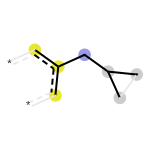

In [118]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')

# Morgan ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÎπÑÌä∏ Í∑∏Î¶¨Í∏∞
fpgen = AllChem.GetMorganGenerator(radius=2)
ao = AllChem.AdditionalOutput()
ao.CollectBitInfoMap()
fp = fpgen.GetFingerprint(mol, additionalOutput=ao)
bi = ao.GetBitInfoMap()

# 872Î≤à ÎπÑÌä∏Ïóê Ìï¥ÎãπÌïòÎäî ÌôòÍ≤ΩÏùÑ Í∑∏Î¶º
img_morgan = Draw.DrawMorganBit(mol, 872, bi)
img_morgan
# ÌååÎûÄÏÉâÏùÄ ÌôòÍ≤ΩÏùò Ï§ëÏã¨ ÏõêÏûêÎ•º, ÎÖ∏ÎûÄÏÉâÏùÄ Î∞©Ìñ•Ï°± ÏõêÏûêÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§.

## Picking Diverse Molecules Using Fingerprints
ÌÅ∞ Î∂ÑÏûê ÏßëÌï©ÏóêÏÑú Íµ¨Ï°∞Ï†ÅÏúºÎ°ú ÏÑúÎ°ú Îã§Î•∏, Ï¶â **Îã§ÏñëÏÑ±(diversity)**Ïù¥ ÎÜíÏùÄ Î∂ÑÏûêÎì§Îßå ÏùºÎ∂Ä ÏÑ†ÌÉùÌïòÍ≥† Ïã∂ÏùÑ Îïå rdkit.SimDivFilters Î™®ÎìàÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§. Í∞ÄÏû• Ìö®Ïú®Ï†ÅÏù∏ Î∞©Î≤ïÏùÄ MaxMin ÏïåÍ≥†Î¶¨Ï¶òÏûÖÎãàÎã§.

1. ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ±: ÏÑ†ÌÉùÌï† Î∂ÑÏûê Ï†ÑÏ≤¥Ïóê ÎåÄÌï¥ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏(Ï£ºÎ°ú Morgan ÎπÑÌä∏ Î≤°ÌÑ∞)Î•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

3. Picker ÏÉùÏÑ±: MaxMinPicker()Î°ú ÏÑ†ÌÉù ÎèÑÍµ¨Î•º ÎßåÎì≠ÎãàÎã§.

3. Îã§ÏñëÌïú Î∂ÑÏûê ÏÑ†ÌÉù: picker.LazyBitVectorPick()Ïóê ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ Î¶¨Ïä§Ìä∏ÏôÄ ÏÑ†ÌÉùÌï† Í∞úÏàòÎ•º Ï†ÑÎã¨ÌïòÏó¨, Îã§ÏñëÏÑ±Ïù¥ ÎÜíÏùÄ Î∂ÑÏûêÎì§Ïùò Ïù∏Îç±Ïä§Î•º ÏñªÏäµÎãàÎã§.

In [122]:
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
fpgen = rdFingerprintGenerator.GetMorganGenerator(radius=3)
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
with Chem.SDMolSupplier('data/actives_5ht3.sdf') as suppl:
  ms = [x for x in suppl if x is not None]
fps = [fpgen.GetFingerprint(x) for x in ms]
# ms: Î∂ÑÏûê Î¶¨Ïä§Ìä∏, fps: ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ Î¶¨Ïä§Ìä∏
nfps = len(fps)

# MaxMin ÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú 10Í∞úÏùò Îã§ÏñëÌïú Î∂ÑÏûê Ïù∏Îç±Ïä§ ÏÑ†ÌÉù
picker = MaxMinPicker()
pickIndices = picker.LazyBitVectorPick(fps, nfps, 3, seed=23)

# Ïù∏Îç±Ïä§Î•º ÏÇ¨Ïö©Ìï¥ Ïã§Ï†ú Î∂ÑÏûê Î¶¨Ïä§Ìä∏ ÎßåÎì§Í∏∞
picks = [ms[x] for x in pickIndices]
picks

In [123]:
# ÎπÑÌä∏ Î≤°ÌÑ∞Í∞Ä ÏïÑÎãå ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Ïùò Í≤ΩÏö∞, LazyPick Ìï®ÏàòÏôÄ ÏßÅÏ†ë Ï†ïÏùòÌïú Í±∞Î¶¨ Í≥ÑÏÇ∞ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÎèôÏùºÌïú ÏûëÏóÖÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§.
fps = [fpgen.GetSparseCountFingerprint(x) for x in ms]
def distij(i,j,fps=fps):
  return 1-DataStructs.DiceSimilarity(fps[i],fps[j])
picker = MaxMinPicker()
pickIndices = picker.LazyPick(distij,nfps,10,seed=23)
list(pickIndices)

[93, 109, 154, 6, 95, 135, 151, 61, 137, 139]

# Ïú†ÏÇ¨ÎèÑ Îßµ ÏÉùÏÑ±ÌïòÍ∏∞ (Similarity Maps)
Ïú†ÏÇ¨ÎèÑ ÎßµÏùÄ Îëê Î∂ÑÏûê Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑÏóê Í∞Å ÏõêÏûêÍ∞Ä ÏñºÎßàÎÇò Í∏∞Ïó¨ÌñàÎäîÏßÄÎ•º ÏÉâÏÉÅÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.

rdkit.Chem.Draw.SimilarityMaps Î™®ÎìàÏùò GetSimilarityMapForFingerprint() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.

1. Î∂ÑÏûê Ï§ÄÎπÑ: ÎπÑÍµêÌï† Î∂ÑÏûê(mol)ÏôÄ Í∏∞Ï§Ä Î∂ÑÏûê(refmol)Î•º Ï§ÄÎπÑÌï©ÎãàÎã§.

2. Îßµ ÏÉùÏÑ±: GetSimilarityMapForFingerprint Ìï®ÏàòÏóê Îëê Î∂ÑÏûê, ÏÇ¨Ïö©Ìï† ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ± Ìï®Ïàò(Ïòà: SimilarityMaps.GetMorganFingerprint), Í∑∏Î¶¨Í≥† RDKit ÎèÑÎ©¥ Í∞ùÏ≤¥Î•º Ï†ÑÎã¨Ìï©ÎãàÎã§.

In [126]:
from rdkit import Chem
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')


[11:54:43] DEPRECATION WARNING: please use AtomPairGenerator
[11:54:43] DEPRECATION WARNING: please use TopologicalTorsionGenerator
[11:54:43] DEPRECATION WARNING: please use MorganGenerator


In [127]:
d2d = Draw.MolDraw2DCairo(400, 400)
_, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint, d2d)

[11:54:52] DEPRECATION WARNING: please use MorganGenerator
[11:54:52] DEPRECATION WARNING: please use MorganGenerator


In [128]:
from rdkit import DataStructs
_, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=1, fpType='count'), d2d, metric=DataStructs.TanimotoSimilarity)

[11:55:05] DEPRECATION WARNING: please use MorganGenerator
[11:55:05] DEPRECATION WARNING: please use MorganGenerator


In [129]:
weights = SimilarityMaps.GetAtomicWeightsForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)
print(["%.2f " % w for w in weights])

['0.05 ', '0.07 ', '0.05 ', '0.08 ', '0.05 ', '0.06 ', '0.03 ', '0.04 ', '-0.01 ', '-0.04 ', '-0.03 ', '-0.05 ', '0.01 ', '0.03 ', '0.07 ', '0.10 ', '0.12 ', '0.11 ', '0.09 ', '0.10 ', '0.09 ', '0.06 ', '0.03 ', '0.02 ', '-0.01 ', '-0.05 ', '0.00 ', '0.00 ', '-0.03 ', '0.02 ', '0.09 ', '0.11 ', '-0.04 ', '0.04 ']


[11:55:35] DEPRECATION WARNING: please use MorganGenerator
[11:55:35] DEPRECATION WARNING: please use MorganGenerator


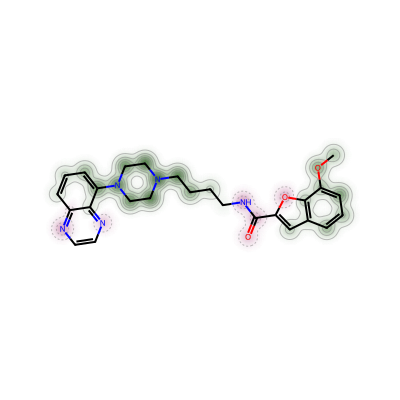

In [132]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import Image, display

# Assuming mol, weights, and d2d are already defined from previous cells

_ = SimilarityMaps.GetSimilarityMapFromWeights(mol, weights, d2d)

# Get the drawing text (PNG data from Cairo backend)
png_data = d2d.GetDrawingText()

# Display the PNG data using IPython.display.Image
display(Image(png_data))

# Descriptor Calculation
RDKitÏùÄ Î∂ÑÏûêÏùò Î¨ºÎ¶¨ÌôîÌïôÏ†Å ÌäπÏÑ±ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî 200Í∞ú Ïù¥ÏÉÅÏùò ÎîîÏä§ÌÅ¨Î¶ΩÌÑ∞Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.
## ÎîîÏä§ÌÅ¨Î¶ΩÌÑ∞ Í≥ÑÏÇ∞
rdkit.Chem.Descriptors Î™®ÎìàÏùÑ ÌÜµÌï¥ Í∞úÎ≥Ñ ÎîîÏä§ÌÅ¨Î¶ΩÌÑ∞Î•º Í≥ÑÏÇ∞ÌïòÍ±∞ÎÇò, CalcMolDescriptors Ìï®ÏàòÎ°ú Î™®Îì† ÎîîÏä§ÌÅ¨Î¶ΩÌÑ∞Î•º Ìïú Î≤àÏóê Í≥ÑÏÇ∞Ìï† Ïàò ÏûàÏäµÎãàÎã§.



In [133]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas

m = Chem.MolFromSmiles('c1ccccc1C(=O)O')

# Í∞úÎ≥Ñ ÎîîÏä§ÌÅ¨Î¶ΩÌÑ∞ Í≥ÑÏÇ∞
print(f"TPSA: {Descriptors.TPSA(m)}")
print(f"MolLogP: {Descriptors.MolLogP(m)}")

# Î™®Îì† ÎîîÏä§ÌÅ¨Î¶ΩÌÑ∞Î•º Ìïú Î≤àÏóê Í≥ÑÏÇ∞ÌïòÏó¨ pandas DataFrameÏúºÎ°ú ÎßåÎì§Í∏∞
mols = [Chem.MolFromSmiles(smi) for smi in ('CCO', 'c1ccccc1C(=O)O')]
descrs = [Descriptors.CalcMolDescriptors(mol) for mol in mols]
df = pandas.DataFrame(descrs)

TPSA: 37.3
MolLogP: 1.3848


Gasteiger Î∂ÄÎ∂Ñ Ï†ÑÌïòÏôÄ Í∞ôÏùÄ ÏùºÎ∂Ä ÏÜçÏÑ±ÏùÄ AllChem.ComputeGasteigerCharges(mol) Ìï®ÏàòÎ•º ÌÜµÌï¥ Í≥ÑÏÇ∞ÎêòÎ©∞, Í∞Å ÏõêÏûêÏóê ÏÜçÏÑ±ÏúºÎ°ú Ï†ÄÏû•Îê©ÎãàÎã§.

## ÎîîÏä§ÌÅ¨Î¶ΩÌÑ∞ ÏãúÍ∞ÅÌôî
Ïú†ÏÇ¨ÎèÑ Îßµ(Similarity Maps)ÏùÑ Ïù¥Ïö©ÌïòÎ©¥, Í∞Å ÏõêÏûêÍ∞Ä Ï†ÑÏ≤¥ ÎîîÏä§ÌÅ¨Î¶ΩÌÑ∞ Í∞íÏóê ÏñºÎßàÎÇò Í∏∞Ïó¨ÌïòÎäîÏßÄÎ•º ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îäî Gasteiger Ï†ÑÌïò, LogP Í∏∞Ïó¨ÎèÑ(Crippen contributions) Îì± ÏõêÏûêÎ≥ÑÎ°ú Î∂ÑÌï¥ Í∞ÄÎä•Ìïú ÎîîÏä§ÌÅ¨Î¶ΩÌÑ∞Ïóê Ïú†Ïö©Ìï©ÎãàÎã§.

In [137]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
d2d = Draw.MolDraw2DCairo(400, 400)
_ = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, d2d, colorMap='jet', contourLines=10)

In [ ]:
# Or for the Crippen contributions to logP:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
_ = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], d2d, colorMap='jet', contourLines=10)

## Chemical Reactions
RDKitÏùÄ SMARTSÎÇò MDL rxn ÌååÏùº ÌòïÏãùÏúºÎ°ú Ï†ïÏùòÎêú ÌôîÌïô Î∞òÏùëÏùÑ Î∂ÑÏûêÏóê Ï†ÅÏö©ÌïòÏó¨ ÏÉùÏÑ±Î¨ºÏùÑ ÏòàÏ∏°Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## Î∞òÏùë Ï†ïÏùò Î∞è Ïã§Ìñâ
AllChem.ReactionFromSmarts(reaction_smarts): [reactant:1]>>[product:1] ÌòïÏãùÏùò SMARTSÎ°ú Î∞òÏùëÏùÑ Ï†ïÏùòÌï©ÎãàÎã§. ÏΩúÎ°†(:)ÏúºÎ°ú ÌëúÏãúÎêú ÏïÑÌÜ∞ ÎßµÌïëÏùÄ ÏõêÏûêÍ∞Ä Î∞òÏùë Ï†ÑÌõÑÏóê Ïñ¥ÎñªÍ≤å Ïù¥ÎèôÌïòÍ≥† Î≥ÄÌïòÎäîÏßÄÎ•º ÏßÄÏ†ïÌïòÎäî ÌïµÏã¨ ÏöîÏÜåÏûÖÎãàÎã§.

rxn.RunReactants((reactant1, reactant2, ...)): Ï†ïÏùòÎêú Î∞òÏùë(rxn)Ïóê Î∞òÏùëÎ¨º ÌäúÌîåÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏÉùÏÑ±Î¨º ÌäúÌîåÏùÑ ÏñªÏäµÎãàÎã§. ÌïòÎÇòÏùò Î∞òÏùëÏù¥ Ïó¨Îü¨ Í∞ÄÎä•Ìïú Í≤ΩÎ°úÎ•º Í∞ÄÏßà Ïàò ÏûàÏúºÎØÄÎ°ú, Í≤∞Í≥ºÎäî ÏÉùÏÑ±Î¨º ÌäúÌîåÎì§Ïùò ÌäúÌîå ((prod1,), (prod2,), ...) ÌòïÌÉúÎ°ú Î∞òÌôòÎê©ÎãàÎã§.

## ÏÉùÏÑ±Î¨º Ï≤òÎ¶¨
Í≥†Ïú† ÏÉùÏÑ±Î¨º ÏñªÍ∏∞: Ïó¨Îü¨ Îß§ÌïëÏúºÎ°ú Ïù∏Ìï¥ ÎèôÏùºÌïú ÏÉùÏÑ±Î¨ºÏù¥ Ï§ëÎ≥µ ÏÉùÏÑ±Îê† Ïàò ÏûàÏäµÎãàÎã§. canonical SMILESÎ•º ÎîïÏÖîÎÑàÎ¶¨Ïùò ÌÇ§Î°ú ÏÇ¨Ïö©ÌïòÎ©¥ Í≥†Ïú†Ìïú ÏÉùÏÑ±Î¨ºÎßå ÏâΩÍ≤å ÌïÑÌÑ∞ÎßÅÌï† Ïàò ÏûàÏäµÎãàÎã§.

Sanitization: Î∞òÏùëÏúºÎ°ú ÏÉùÏÑ±Îêú Î∂ÑÏûêÎäî ÏõêÏûêÍ∞ÄÎÇò Î∞©Ìñ•Ï°±ÏÑ± Îì±Ïù¥ Ïò¨Î∞îÎ•¥ÏßÄ ÏïäÏùÑ Ïàò ÏûàÏäµÎãàÎã§. Îî∞ÎùºÏÑú Ï∂îÍ∞Ä Î∂ÑÏÑù Ï†ÑÏóê Î∞òÎìúÏãú Chem.SanitizeMol(mol) Ìï®ÏàòÎ°ú "Ï†ïÎ¶¨"Ìï¥Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.

In [141]:
# ÏïÑÎßàÏù¥Îìú Í≤∞Ìï© ÌòïÏÑ± Î∞òÏùë Ï†ïÏùò
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')
reactants = (Chem.MolFromSmiles('CC(=O)O'), Chem.MolFromSmiles('NC'))

# Î∞òÏùë Ïã§Ìñâ
ps = rxn.RunReactants(reactants)
product_smi = Chem.MolToSmiles(ps[0][0])
product_smi

'CNC(C)=O'

## Drawing Chemical Reactions
MolDraw2DÎ•º ÏÇ¨Ïö©Ìï¥ ÌôîÌïô Î∞òÏùëÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌëúÌòÑÌï† Ïàò ÏûàÏäµÎãàÎã§.

d2d.DrawReaction(rxn): Î∞òÏùëÏãùÏùÑ ÏïÑÌÜ∞ Îßµ Î≤àÌò∏ÏôÄ Ìï®Íªò Í∑∏Î¶ΩÎãàÎã§.

d2d.DrawReaction(rxn, highlightByReactant=True): ÏÉùÏÑ±Î¨ºÏùò ÏõêÏûêÎì§Ïù¥ Ïñ¥Îñ§ Î∞òÏùëÎ¨ºÎ°úÎ∂ÄÌÑ∞ Ïú†ÎûòÌñàÎäîÏßÄ Îã§Î•∏ ÏÉâÏúºÎ°ú Í∞ïÏ°∞ÌïòÏó¨ ÌëúÏãúÌï¥ Ï§çÎãàÎã§.

PNG Î©îÌÉÄÎç∞Ïù¥ÌÑ∞: Î∂ÑÏûê Í∑∏Î¶ºÍ≥º ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú, Î∞òÏùëÏùÑ Í∑∏Î¶∞ PNG Ïù¥ÎØ∏ÏßÄÏóêÎèÑ Î©îÌÉÄÎç∞Ïù¥ÌÑ∞Í∞Ä Ìè¨Ìï®ÎêòÏñ¥ AllChem.ReactionFromPNGString() Ìï®ÏàòÎ°ú Î∞òÏùë Í∞ùÏ≤¥Î•º Îã§Ïãú Î≥µÏõêÌï† Ïàò ÏûàÏäµÎãàÎã§.

## Protecting Atoms
ÎïåÎ°úÎäî Î∞òÏùë Ï°∞Í±¥(SMARTS)Ïù¥ ÎÑàÎ¨¥ ÏùºÎ∞òÏ†ÅÏù¥Ïñ¥ÏÑú ÏõêÌïòÏßÄ ÏïäÎäî ÏõêÏûêÍπåÏßÄ Î∞òÏùëÏóê Ï∞∏Ïó¨ÌïòÎäî Í≤ΩÏö∞Í∞Ä ÏûàÏäµÎãàÎã§. _protected ÏÜçÏÑ±ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÌäπÏ†ï ÏõêÏûêÍ∞Ä Î∞òÏùëÏóê Ï∞∏Ïó¨ÌïòÏßÄ ÏïäÎèÑÎ°ù "Î≥¥Ìò∏"Ìï† Ïàò ÏûàÏäµÎãàÎã§.

1. Î≥¥Ìò∏ÌïòÍ≥† Ïã∂ÏùÄ ÏõêÏûêÎ•º Î∂ÄÎ∂Ñ Íµ¨Ï°∞ Í≤ÄÏÉâ Îì±ÏúºÎ°ú Ï∞æÏäµÎãàÎã§.

2. Ìï¥Îãπ ÏõêÏûêÏóê atom.SetProp('_protected', '1') ÏΩîÎìúÎ°ú ÏÜçÏÑ±ÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.

3. RunReactantsÎ•º Ïã§ÌñâÌïòÎ©¥, RDKitÏùÄ _protected ÏÜçÏÑ±Ïù¥ ÏÑ§Ï†ïÎêú ÏõêÏûêÎ•º Ìè¨Ìï®ÌïòÎäî Îß§ÏπòÎ•º ÏûêÎèôÏúºÎ°ú Î¨¥ÏãúÌï©ÎãàÎã§.

In [143]:
rxn = AllChem.ReactionFromRxnFile('data/AmideBond.rxn')
acid = Chem.MolFromSmiles('CC(=O)O')
base = Chem.MolFromSmiles('CC(=O)NCCN')
ps = rxn.RunReactants((acid,base))
len(ps)
Chem.MolToSmiles(ps[0][0])
Chem.MolToSmiles(ps[1][0])

'CC(=O)NCCNC(C)=O'

In [144]:
# ÏïÑÎßàÏù¥Îìú ÏßàÏÜå(N)Î•º Î≥¥Ìò∏ÌïòÍ∏∞ ÏúÑÌïú Ìå®ÌÑ¥
amidep = Chem.MolFromSmarts('[N;$(NC=[O,S])]')
# ÏïÑÎßàÏù¥Îìú ÏßàÏÜåÎ•º Ï∞æÏïÑ '_protected' ÏÜçÏÑ± ÏÑ§Ï†ï
for match in base.GetSubstructMatches(amidep):
    base.GetAtomWithIdx(match[0]).SetProp('_protected','1')

In [146]:
# Ïù¥Ï†ú Î∞òÏùëÏùÑ Ïã§ÌñâÌïòÎ©¥ Î≥¥Ìò∏Îêú ÏïÑÎßàÏù¥Îìú ÏßàÏÜå ÎåÄÏã† ÏïÑÎØº ÏßàÏÜåÎßå Î∞òÏùëÌï®
ps = rxn.RunReactants((acid,base))
len(ps)
# (ÏõêÏπò ÏïäÎäî Î∂ÄÎ∞òÏùëÏù¥ ÏùºÏñ¥ÎÇòÏßÄ ÏïäÏùå)

1

In [147]:
Chem.MolToSmiles(ps[0][0])

'CC(=O)NCCNC(C)=O'

## Î∂ÑÏûê Î∂ÑÌï¥ ÏïåÍ≥†Î¶¨Ï¶ò
Î∂ÑÏûêÎ•º Ìï©ÏÑ±Ï†ÅÏúºÎ°ú ÏùòÎØ∏ ÏûàÎäî ÏûëÏùÄ Ï°∞Í∞ÅÏúºÎ°ú Î∂ÑÌï¥ÌïòÎäî Îëê Í∞ÄÏßÄ Ï£ºÏöî ÏïåÍ≥†Î¶¨Ï¶ò

### Recap (Í≥ÑÏ∏µÏ†Å Î∂ÑÌï¥)
RecapÏùÄ ÏùºÎ∞òÏ†ÅÏù∏ Ïã§ÌóòÏã§ Î∞òÏùëÏùÑ Î™®Î∞©Ìïú Í∑úÏπôÏóê Îî∞Îùº Î∂ÑÏûêÎ•º Î∂ÑÌï¥ÌïòÍ≥†, Í∑∏ Î∂ÑÌï¥ Í≥ºÏ†ïÏùÑ Í≥ÑÏ∏µ(hierarchy) Íµ¨Ï°∞Î°ú Í∏∞Î°ùÌï©ÎãàÎã§.

- Recap.RecapDecompose(mol)Îäî RecapHierarchyNodeÎùºÎäî Ìä∏Î¶¨ Íµ¨Ï°∞Ïùò Í∞ùÏ≤¥Î•º Î∞òÌôòÌï©ÎãàÎã§.

- Ïù¥ Í∞ùÏ≤¥Ïùò children ÏÜçÏÑ±ÏùÑ ÌÜµÌï¥ Ìïú Îã®Í≥Ñ ÏïÑÎûòÏùò Ï°∞Í∞ÅÎì§ÏùÑ, GetLeaves() Î©îÏÑúÎìúÎ•º ÌÜµÌï¥ ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÎÇ®ÏùÄ Í∞ÄÏû• ÏûëÏùÄ Ï°∞Í∞ÅÎì§ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

###  BRICS (Í∑úÏπô Í∏∞Î∞ò Î∂ÑÌï¥ Î∞è Ïû¨Ï°∞Ìï©)
BRICSÎäî Ìï©ÏÑ±Ï†ÅÏúºÎ°ú Ï†àÎã® Í∞ÄÎä•Ìïú Í≤∞Ìï©ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÏûêÎ•º Î∂ÑÌï¥ÌïòÎäî Îòê Îã§Î•∏ ÏïåÍ≥†Î¶¨Ï¶òÏûÖÎãàÎã§.

- BRICS.BRICSDecompose(mol): Î∂ÑÏûêÎ•º Î∂ÑÌï¥ÌïòÏó¨ Í≥†Ïú†Ìïú Ï°∞Í∞ÅÎì§Ïùò SMILESÎ•º set ÌòïÌÉúÎ°ú Î∞òÌôòÌï©ÎãàÎã§. Ïù¥Îïå ÏÉùÏÑ±ÎêòÎäî ÎçîÎØ∏ ÏõêÏûê(*)ÏóêÎäî Ïñ¥Îñ§ Í∑úÏπôÏúºÎ°ú Ï†àÎã®ÎêòÏóàÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÌÉúÍ∑∏Í∞Ä Î∂ôÏäµÎãàÎã§.

- BRICS.BRICSBuild(fragments): BRICSDecomposeÎ°ú ÏñªÏùÄ Ï°∞Í∞ÅÎì§ÏùÑ Îã§Ïãú Ï°∞Ìï©ÌïòÏó¨ ÏÉàÎ°úÏö¥ Î∂ÑÏûêÎì§ÏùÑ ÏÉùÏÑ±ÌïòÎäî **ÏÉùÏÑ±Í∏∞(generator)**Î•º Î∞òÌôòÌï©ÎãàÎã§. Ïù¥ Í∏∞Îä•ÏùÄ Ï°∞Ìï© ÎùºÏù¥Î∏åÎü¨Î¶¨(combinatorial library)Î•º ÎßåÎìúÎäî Îç∞ Ïú†Ïö©Ìï©ÎãàÎã§.

## ÏÇ¨Ïö©Ïûê ÏßÄÏ†ï Î∂ÑÏûê Î∂ÑÌï¥ ‚úÇÔ∏è
Chem.FragmentOnBonds Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ ÏÇ¨Ïö©ÏûêÍ∞Ä ÏßÅÏ†ë ÏßÄÏ†ïÌïú ÌäπÏ†ï Í≤∞Ìï©Îì§ÏùÑ Ï†àÎã®ÌïòÏó¨ Î∂ÑÏûêÎ•º Î∂ÑÌï¥Ìï† Ïàò ÏûàÏäµÎãàÎã§.

1. Í≤∞Ìï© Ï∞æÍ∏∞: Î∂ÄÎ∂Ñ Íµ¨Ï°∞ Í≤ÄÏÉâ Îì± ÏõêÌïòÎäî Î∞©Î≤ïÏúºÎ°ú Ï†àÎã®Ìï† Í≤∞Ìï©Îì§Ïùò Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏Î•º ÎßåÎì≠ÎãàÎã§. (Ïòà: [!R][R] SMARTSÎäî Í≥†Î¶¨ ÏõêÏûêÏôÄ ÎπÑÍ≥†Î¶¨ ÏõêÏûê ÏÇ¨Ïù¥Ïùò Í≤∞Ìï©ÏùÑ Ï∞æÏäµÎãàÎã§.)

2. Î∂ÑÏûê Î∂ÑÌï¥: Chem.FragmentOnBonds(mol, bond_indices) Ìï®ÏàòÏóê Î∂ÑÏûêÏôÄ Í≤∞Ìï© Ïù∏Îç±Ïä§ Î¶¨Ïä§Ìä∏Î•º Ï†ÑÎã¨Ìï©ÎãàÎã§.

3. Í≤∞Í≥º: ÏÉàÎ°úÏö¥ Î∂ÑÏûê Í∞ùÏ≤¥Í∞Ä Î∞òÌôòÎê©ÎãàÎã§. dummyLabels Ïù∏ÏûêÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Ïù¥ ÎçîÎØ∏ ÏõêÏûêÏóê ÏõêÌïòÎäî ÎùºÎ≤®ÏùÑ Î∂ôÏó¨ Ï†àÎã® ÏßÄÏ†êÏùÑ Íµ¨Î∂ÑÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [149]:
m = Chem.MolFromSmiles('CC1CC(O)C1CCC1CC1')

# Í≥†Î¶¨ÏôÄ ÎπÑÍ≥†Î¶¨ ÏÇ¨Ïù¥Ïùò Í≤∞Ìï© Ï∞æÍ∏∞
bis = m.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]'))
bs = [m.GetBondBetweenAtoms(x,y).GetIdx() for x,y in bis]

# ÏßÄÏ†ïÎêú Í≤∞Ìï©Îì§ÏùÑ Ï†àÎã®
nm = Chem.FragmentOnBonds(m, bs)
Chem.MolToSmiles(nm, True)

'*C1CC([4*])C1[6*].[1*]C.[3*]O.[5*]CC[8*].[7*]C1CC1'

## ÌôîÌïôÏ†Å ÌäπÏßïÍ≥º ÌååÎßàÏΩîÌè¨Ïñ¥ ‚ú®
ÌôîÌïôÏ†Å ÌäπÏßï Ï∞æÍ∏∞
RDKitÏùÄ SMARTS Í∏∞Î∞òÏùò Í∑úÏπô ÌååÏùº(.fdef)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î∂ÑÏûê ÎÇ¥Ïùò ÏàòÏÜåÍ≤∞Ìï© Ï£ºÍ∞ú/Î∞õÍ∞ú, Î∞©Ìñ•Ï°± Í≥†Î¶¨ Îì±Í≥º Í∞ôÏùÄ **ÌôîÌïôÏ†Å ÌäπÏßï(chemical features)**ÏùÑ Ï∞æÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

ChemicalFeatures.BuildFeatureFactory(fdef_ÌååÏùº_Í≤ΩÎ°ú)Î°ú ÌäπÏßï ÏÉùÏÑ± Í≥µÏû•(factory)ÏùÑ ÎßåÎì≠ÎãàÎã§.

factory.GetFeaturesForMol(mol)Î•º Ìò∏Ï∂úÌïòÏó¨ Î∂ÑÏûê ÎÇ¥ Î™®Îì† ÌäπÏßïÏùÑ Ï∞æÏäµÎãàÎã§.

Ï∞æÏïÑÎÇ∏ Í∞Å ÌäπÏßï(feature)ÏùÄ ÏûêÏã†Ïùò Ï¢ÖÎ•ò(GetFamily), ÏÑ∏Î∂Ä ÌÉÄÏûÖ(GetType), Í∑∏Î¶¨Í≥† Ìï¥ÎãπÌïòÎäî ÏõêÏûêÎì§Ïùò Ïù∏Îç±Ïä§(GetAtomIds) Ï†ïÎ≥¥Î•º Í∞ÄÏßëÎãàÎã§.

2D ÌååÎßàÏΩîÌè¨Ïñ¥ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏
Ïù¥Îäî Î∂ÑÏûê ÎÇ¥ ÌôîÌïôÏ†Å ÌäπÏßïÎì§Ïùò Ï¢ÖÎ•òÏôÄ Í∑∏ ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º Ï°∞Ìï©ÌïòÏó¨ ÎßåÎìúÎäî ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏûÖÎãàÎã§.

ChemicalFeatures.BuildFeatureFactoryÎ°ú ÌäπÏßï ÏÉùÏÑ±Í∏∞(feature factory)Î•º Î®ºÏ†Ä ÎßåÎì≠ÎãàÎã§.

SigFactory (Signature Factory)Î•º ÏÉùÏÑ±ÌïòÏó¨, ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Ïóê ÏÇ¨Ïö©Ìï† ÌäπÏßïÏùò Ï°∞Ìï©(ÏµúÏÜå/ÏµúÎåÄ Í∞úÏàò)Í≥º ÌäπÏßï Í∞ÑÏùò Í±∞Î¶¨ Íµ¨Í∞Ñ(bin)ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.

Generate.Gen2DFingerprint(mol, sigFactory)Î•º Ìò∏Ï∂úÌïòÏó¨ ÏµúÏ¢Ö ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.

Ïù¥ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Ïùò Í∞Å ÎπÑÌä∏Îäî sigFactory.GetBitDescription()Î•º ÌÜµÌï¥ Ïñ¥Îñ§ ÌäπÏßïÎì§Ïùò Ï°∞Ìï©ÏúºÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÎäîÏßÄ ÏâΩÍ≤å Ìï¥ÏÑùÌï† Ïàò ÏûàÏäµÎãàÎã§.

## Î∂ÑÏûê Ï°∞Í∞Å (Molecular Fragments) üß©
Î∂ÑÏûêÎ•º ÏûëÏùÄ Ï°∞Í∞ÅÎì§Ïùò Í≥ÑÏ∏µ Íµ¨Ï°∞Î°ú Î∂ÑÌï¥ÌïòÍ≥†, Ïù¥Î•º Í∏∞Î∞òÏúºÎ°ú ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Î•º ÏÉùÏÑ±ÌïòÎäî Í∏∞Îä•ÏûÖÎãàÎã§.

Ïπ¥ÌÉàÎ°úÍ∑∏ ÏÉùÏÑ±: FragmentCatalog.FragCatalogÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Î∂ÑÌï¥Îêú Ï°∞Í∞ÅÎì§ÏùÑ Îã¥ÏùÑ Ïπ¥ÌÉàÎ°úÍ∑∏Î•º ÎßåÎì≠ÎãàÎã§. FragCatGeneratorÏùò AddFragsFromMol Î©îÏÑúÎìúÎ°ú Ïó¨Îü¨ Î∂ÑÏûêÎ•º Î∂ÑÌï¥ÌïòÏó¨ Ïπ¥ÌÉàÎ°úÍ∑∏Ïóê Ï∂îÍ∞ÄÌï©ÎãàÎã§.

ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ±: FragmentCatalog.FragFPGeneratorÎ•º ÏÇ¨Ïö©Ìï¥, ÏúÑÏóêÏÑú ÎßåÎì† Ïπ¥ÌÉàÎ°úÍ∑∏Î•º Í∏∞Ï§ÄÏúºÎ°ú Î∂ÑÏûêÎ•º Ï°∞Í∞Å Í∏∞Î∞ò ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.

ÌôúÏö©: ÏÉùÏÑ±Îêú ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Îäî Îëê Î∂ÑÏûê Í∞ÑÏùò Í≥µÌÜµ Ï°∞Í∞ÅÏùÑ Ï∞æÍ±∞ÎÇò(ÎπÑÌä∏ AND Ïó∞ÏÇ∞), ÌôúÏÑ±/ÎπÑÌôúÏÑ± ÌôîÌï©Î¨ºÏùÑ Íµ¨Î∂ÑÌïòÎäî Ï£ºÏöî Ï°∞Í∞ÅÏùÑ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Î∂ÑÏÑùÌïòÎäî(Ïòà: InfoBitRanker) Îì± Îã§ÏñëÌïòÍ≤å ÌôúÏö©Îê† Ïàò ÏûàÏäµÎãàÎã§.

## R-Í∑∏Î£π Î∂ÑÌï¥ (R-Group Decomposition) üß¨
R-Í∑∏Î£π Î∂ÑÌï¥Îäî ÏùºÎ†®Ïùò Î∂ÑÏûêÎì§ÏùÑ Í≥µÌÜµÎêú ÏΩîÏñ¥(core) Íµ¨Ï°∞ÏôÄ Îã§ÏñëÌïú **Í≥ÅÍ∞ÄÏßÄ(R-group)**Î°ú Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Î∂ÑÌï¥ÌïòÎäî Í∞ïÎ†•Ìïú Í∏∞Îä•ÏûÖÎãàÎã§. Ïù¥Îäî Íµ¨Ï°∞-ÌôúÏÑ± Í¥ÄÍ≥Ñ(SAR) Î∂ÑÏÑùÏóê ÌïµÏã¨Ï†ÅÏûÖÎãàÎã§.

ÏΩîÏñ¥ Ï†ïÏùò: Î∂ÑÏÑùÌï† Î∂ÑÏûêÎì§Ïùò Í≥µÌÜµ ÏΩîÏñ¥Î•º SMARTSÎ°ú Ï†ïÏùòÌï©ÎãàÎã§. Ïù¥Îïå Í≥ÅÍ∞ÄÏßÄÍ∞Ä Î∂ôÎäî ÏúÑÏπòÎ•º [*:1], [*:2] ÏôÄ Í∞ôÏù¥ ÏïÑÌÜ∞ ÎßµÏúºÎ°ú ÎùºÎ≤®ÎßÅÌï©ÎãàÎã§.

Î∂ÑÌï¥ Ïã§Ìñâ: rdRGroupDecomposition.RGroupDecompose([core], mol_list) Ìï®ÏàòÎ•º Ìò∏Ï∂úÌï©ÎãàÎã§.

Í≤∞Í≥º ÌôïÏù∏: Í≤∞Í≥ºÎäî Í∞Å Î∂ÑÏûêÏóê ÎåÄÌïú ÎîïÏÖîÎÑàÎ¶¨Ïùò Î¶¨Ïä§Ìä∏Î°ú Î∞òÌôòÎê©ÎãàÎã§. Í∞Å ÎîïÏÖîÎÑàÎ¶¨ÏóêÎäî Îß§ÏπòÎêú 'Core'ÏôÄ Í∞Å ÎùºÎ≤®Ïóê Ìï¥ÎãπÌïòÎäî R-Í∑∏Î£π('R1', 'R2', ...) Ï†ïÎ≥¥Í∞Ä Îã¥Í≤® ÏûàÏäµÎãàÎã§. Ïù¥ Í≤∞Í≥ºÎäî pandas.DataFrame(res) ÏΩîÎìúÎ°ú Îß§Ïö∞ ÏâΩÍ≤å SAR Î∂ÑÏÑù ÌÖåÏù¥Î∏îÎ°ú Î≥ÄÌôòÌï† Ïàò ÏûàÏäµÎãàÎã§.



In [151]:
from rdkit import Chem
from rdkit.Chem import rdRGroupDecomposition as rdRGD
import pandas as pd

# Î∂ÑÏÑùÌï† Î∂ÑÏûê Î¶¨Ïä§Ìä∏ (ms)Í∞Ä ÏûàÎã§Í≥† Í∞ÄÏ†ï
# R-Í∑∏Î£π attachment pointÎ•º ÎùºÎ≤®ÎßÅÌïú ÏΩîÏñ¥ Ï†ïÏùò
core = Chem.MolFromSmarts('[*:1]c1nc([*:2])on1')

# R-Í∑∏Î£π Î∂ÑÌï¥ Ïã§Ìñâ
res, unmatched = rdRGD.RGroupDecompose([core], ms, asSmiles=True)

# Í≤∞Í≥ºÎ•º pandas DataFrameÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ ÏâΩÍ≤å ÌôïÏù∏
df = pd.DataFrame(res)

[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[12:12:21] No core matches
[

# Searching Synthon Spaces
RDKitÏùÄ ÏàòÏã≠Ïñµ Í∞úÏóê Îã¨ÌïòÎäî Í±∞ÎåÄ Í∞ÄÏÉÅ ÎùºÏù¥Î∏åÎü¨Î¶¨(Enamine REAL, ChemSpace Îì±)Î•º Ìö®Ïú®Ï†ÅÏúºÎ°ú Í≤ÄÏÉâÌïòÎäî Synthon Space Search Í∏∞Îä•ÏùÑ Ï†úÍ≥µ

Ïù¥ Í∏∞Îä•ÏùÄ ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò Î™®Îì† ÌôîÌï©Î¨ºÏùÑ ÏÉùÏÑ±ÌïòÏßÄ ÏïäÍ≥†, ÎπåÎî© Î∏îÎ°ùÏù∏ synthon ÌòïÌÉúÎ°ú ÏßÅÏ†ë Í≤ÄÏÉâÌïòÏó¨ ÏûëÎèô

Í∞ÄÏÉÅ ÎùºÏù¥Î∏åÎü¨Î¶¨Îäî Ïó¨Îü¨ Ïã†ÌÜ§ ÏÑ∏Ìä∏ÏôÄ Ïù¥Îì§ÏùÑ Ï°∞Ìï©ÌïòÎäî Î∞òÏùë Í∑úÏπôÏúºÎ°ú Ï†ïÏùòÎê©ÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥, 4Í∞ÄÏßÄ acid Ïã†ÌÜ§Í≥º 3Í∞ÄÏßÄ amine Ïã†ÌÜ§Ïù¥ ÏïÑÎßàÏù¥Îìú Í≤∞Ìï© Í∑úÏπôÏúºÎ°ú Ï†ïÏùòÎêòÏñ¥ ÏûàÎã§Î©¥, Ï¥ù 4 x 3 = 12Í∞úÏùò ÌôîÌï©Î¨º ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÌòïÏÑ±

Í≤ÄÏÉâ ÏïåÍ≥†Î¶¨Ï¶òÏùÄ ÏÇ¨Ïö©ÏûêÏùò ÏøºÎ¶¨ Î∂ÑÏûêÎ•º Í∞ÄÎä•Ìïú Ïã†ÌÜ§ Ï°∞Í∞ÅÏúºÎ°ú Î∂ÑÌï¥Ìïú Îí§, Ïù¥ Ï°∞Í∞ÅÎì§Í≥º ÏùºÏπòÌïòÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨ ÎÇ¥ Ïã†ÌÜ§ Ï°∞Ìï©ÏùÑ Ï∞æÏïÑÎÇ∏ ÌõÑ, Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎäî Ï°∞Ìï©ÎßåÏùÑ Ïã§Ï†ú ÌôîÌï©Î¨ºÎ°ú ÎßåÎì§Ïñ¥ ÏµúÏ¢Ö ÎπÑÍµêÎ•º ÏàòÌñâ. Ïù¥ Î∞©ÏãùÏùÄ ÏàòÏã≠Ïñµ Í∞úÏùò ÌôîÌï©Î¨ºÏùÑ ÎØ∏Î¶¨ ÏÉùÏÑ±ÌïòÍ≥† Í≤ÄÏÉâÌïòÎäî Í≤ÉÎ≥¥Îã§ Ìõ®Ïî¨ Ìö®Ïú®Ï†ÅÏûÖÎãàÎã§.

### Database Preparation
Ïã†ÌÜ§ ÎùºÏù¥Î∏åÎü¨Î¶¨Îäî Î≥¥ÌÜµ ÌÖçÏä§Ìä∏ ÌååÏùºÎ°ú Ï†úÍ≥µÎêòÏßÄÎßå, Í≤ÄÏÉâ Ï†ÑÏóê ÏÉÅÎãπÌïú Ï†ÑÏ≤òÎ¶¨ Í≥ºÏ†ïÏù¥ ÌïÑÏöîÌïòÏó¨ Îß§Ïö∞ ÎäêÎ¶ΩÎãàÎã§. Îî∞ÎùºÏÑú ÏÇ¨Ïö© Ï†ÑÏóê Î∞òÎìúÏãú Î∞îÏù¥ÎÑàÎ¶¨ Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§(.spc ÌååÏùº)Î•º ÏÉùÏÑ±ÌïòÎäî Í≤ÉÏù¥ Í∞ïÎ†•Ìûà Í∂åÏû•Îê©ÎãàÎã§.

1. ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ±Í∏∞ ÏÑ†ÌÉù: Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïóê Ï†ÄÏû•Ìï† ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ Ï¢ÖÎ•òÎ•º Í≤∞Ï†ïÌï©ÎãàÎã§. Ïù¥ ÏÑ†ÌÉùÏùÄ Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÌååÏùºÏóê ÏòÅÍµ¨Ï†ÅÏúºÎ°ú Ï†ÅÏö©Îê©ÎãàÎã§.

2. Î≥ÄÌôò Ìï®Ïàò ÏÇ¨Ïö©: rdSynthonSpaceSearch.ConvertTextToDBFile() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ ÌÖçÏä§Ìä∏ ÌååÏùºÏùÑ Î∞îÏù¥ÎÑàÎ¶¨ Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Î°ú Ìïú Î≤àÏóê Î≥ÄÌôòÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [ ]:
from rdkit.Chem import rdSynthonSpaceSearch, rdFingerprintGenerator

# ÏÇ¨Ïö©Ìï† ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÉùÏÑ±Í∏∞ Ï†ïÏùò
fpgen = rdFingerprintGenerator.GetMorganGenerator(fpSize=2048)
textFile = "path/to/your/synthon_space.txt"
dbFile = "amide_library_morgan.spc"

# ÌÖçÏä§Ìä∏ ÌååÏùºÏùÑ Î∞îÏù¥ÎÑàÎ¶¨ DB ÌååÏùºÎ°ú Î≥ÄÌôò (ÏãúÍ∞ÑÏù¥ Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÎäî 1ÌöåÏÑ± ÏûëÏóÖ)
rdSynthonSpaceSearch.ConvertTextToDBFile(textFile, dbFile, fpgen)

## Í≤ÄÏÉâ Ïã§Ìñâ üîç
Ï§ÄÎπÑÎêú Î∞îÏù¥ÎÑàÎ¶¨ Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Î•º ÏùΩÏñ¥ Îì§Ïù∏ ÌõÑ, Î∂ÄÎ∂Ñ Íµ¨Ï°∞ Í≤ÄÏÉâ ÎòêÎäî Ïú†ÏÇ¨ÎèÑ Í≤ÄÏÉâÏùÑ ÏàòÌñâÌï† Ïàò ÏûàÏäµÎãàÎã§.

### Î∂ÄÎ∂Ñ Íµ¨Ï°∞ Í≤ÄÏÉâ
SubstructureSearch() Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©ÌïòÏó¨ SMARTS Ìå®ÌÑ¥Í≥º ÏùºÏπòÌïòÎäî ÌôîÌï©Î¨ºÏùÑ Í≤ÄÏÉâÌï©ÎãàÎã§. SynthonSpaceSearchParams Í∞ùÏ≤¥Î•º ÌÜµÌï¥ ÏµúÎåÄ ÌûàÌä∏ Ïàò(maxHits)ÎÇò ÏãúÍ∞ÑÏ†úÌïú(timeout) Îì±ÏùÑ ÏÑ§Ï†ïÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [156]:
from rdkit import Chem
from rdkit.Chem import rdSynthonSpaceSearch

# Î∞îÏù¥ÎÑàÎ¶¨ DB ÏùΩÍ∏∞
spc = rdSynthonSpaceSearch.SynthonSpace()
spc.ReadDBFile("amide_library_morgan.spc")

# Í≤ÄÏÉâ ÏøºÎ¶¨
qmol = Chem.MolFromSmarts("c1ccccc1C(=O)N")

# Í≤ÄÏÉâ Ïã§Ìñâ
results = spc.SubstructureSearch(qmol)
print(f"Number of hits : {len(results.GetHitMolecules())}")

RuntimeError: Couldn't open file amide_library_morgan.spc

### Ïú†ÏÇ¨ÎèÑ Í≤ÄÏÉâ
Ïú†ÏÇ¨ÎèÑ Í≤ÄÏÉâÏùÄ Tanimoto Í≥ÑÏàòÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏøºÎ¶¨ Î∂ÑÏûêÏôÄ Ïú†ÏÇ¨Ìïú ÌôîÌï©Î¨ºÏùÑ Ï∞æÏäµÎãàÎã§.

Îß§Ïö∞ Ï§ëÏöîÌïú Ï†êÏùÄ, Í≤ÄÏÉâÏóê ÏÇ¨Ïö©ÌïòÎäî ÏøºÎ¶¨ Î∂ÑÏûêÏùò ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Í∞Ä Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÉùÏÑ± Ïãú ÏÇ¨Ïö©Îêú ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ÏôÄ Ï†ïÌôïÌûà ÎèôÏùºÌïú ÏÑ§Ï†ïÏù¥Ïñ¥Ïïº ÌïúÎã§Îäî Í≤ÉÏûÖÎãàÎã§. spc.GetSynthonFingerprintType() Î©îÏÑúÎìúÎ°ú Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§Ïóê ÏÇ¨Ïö©Îêú ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ ÏÑ§Ï†ïÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Ïú†ÏÇ¨ÎèÑ Í≤ÄÏÉâÏùÄ 2Îã®Í≥ÑÎ°ú ÏßÑÌñâÎê©ÎãàÎã§. Î®ºÏ†Ä Ïã†ÌÜ§ ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏Ïùò Ìï©ÏúºÎ°ú Í∑ºÏÇ¨Ï†ÅÏù∏ Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ 1Ï∞® Ïä§ÌÅ¨Î¶¨ÎãùÏùÑ ÌïòÍ≥†, Ïù¥Î•º ÌÜµÍ≥ºÌïú Ï°∞Ìï©Îßå Ïã§Ï†ú ÌôîÌï©Î¨ºÎ°ú ÎßåÎì§Ïñ¥ Ï†ïÌôïÌïú Ïú†ÏÇ¨ÎèÑÎ•º Í≥ÑÏÇ∞Ìï©ÎãàÎã§.

## Í∏∞ÌÉÄ RDKit Í∏∞Îä•
Ìï®Íªò Ï†úÍ≥µÎêú Î¨∏ÏÑúÏùò ÎßàÏßÄÎßâ Î∂ÄÎ∂ÑÏùÄ Synthon SpaceÏôÄ ÏßÅÏ†ë Í¥ÄÎ†®ÏùÄ ÏóÜÏßÄÎßå Ïú†Ïö©Ìïú RDKitÏùò ÏùºÎ∞òÏ†ÅÏù∏ Í∏∞Îä•Îì§ÏûÖÎãàÎã§.

ÎπÑÌä∏ Î≤°ÌÑ∞ (Bit Vectors): ÌïëÍ±∞ÌîÑÎ¶∞Ìä∏ Ï†ÄÏû•ÏùÑ ÏúÑÌïú Ìö®Ïú®Ï†ÅÏù∏ Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ÏûÖÎãàÎã§. SparseBitVects(Ìù¨ÏÜå)ÏôÄ ExplicitBitVects(Î∞ÄÏßë) Îëê Ï¢ÖÎ•òÍ∞Ä ÏûàÏäµÎãàÎã§.

ÎèÑÏõÄÎßê ÏñªÍ∏∞ (Getting Help): ÌååÏù¥Ïç¨Ïùò help() Î™ÖÎ†πÏñ¥Î•º ÏÇ¨Ïö©ÌïòÎ©¥ RDKit Í∞ùÏ≤¥ÏôÄ Î©îÏÑúÎìúÏóê ÎåÄÌïú ÏÉÅÏÑ∏Ìïú ÏÑ§Î™Ö(docstring)ÏùÑ ÏßÅÏ†ë ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.